The industrial sector is a significant contributor to global carbon emissions and energy consumption. However, there is considerable variability in how different countries manage these impacts. Some countries exhibit high levels of efficiency and low carbon intensity, while others struggle with high emissions and energy usage. This disparity reflects underlying differences in technology, policy, economic development, and industrial practices. Understanding these differences is crucial for formulating effective policies and strategies to promote sustainable industrial development globally.

Based on the data and initial analysis, the project seeks to address the following research questions:

    How do economic development levels correlate with carbon and energy intensity in industrial sectors?
        Investigating the relationship between a country's economic status and its environmental impact can reveal patterns and inform targeted interventions.

    What are the key factors driving outliers in value added carbon and energy intensity metrics?
        Identifying the causes of significant deviations in carbon and energy intensity will help pinpoint areas that require special attention and improvement.

    How did the COVID-19 pandemic impact industrial energy and carbon intensity across different countries?
        Analyzing the effects of the COVID-19 pandemic on industrial performance and environmental impact can provide insights into the resilience and adaptability of different sectors and countries.

    What policy measures can be inferred to reduce carbon and energy intensity in the most affected sectors and countries?
        Translating data findings into actionable policy recommendations will aid in promoting more sustainable and efficient industrial practices worldwide.

Using: historical data from 2015 to 2021. Note: China data is not available in dataset. 'Constant 2015 prices' to allow for better comparability and analysis as it is a method of adjusting economic data for inflation or deflation where prices are expressed in terms of a base year of 2015.

Data from: https://www.iea.org/data-and-statistics/data-product/energy-and-emissions-per-value-added-database

MJ/USD PPP 2015: Megajoules per US Dollar at Purchasing Power Parity: An indicator that measures magajoules(MJ) of energy and are used per US dollar of economic output adjusted for purchasing power parity (PPP) that accounts for different price levels between countries.

KgC02/USD PPP 2015 (Kilograms of C02 per US Dollar at Purchasing Power Parity: It measures carbon intensity showing how many kilograms of carbon dioxide (C02) emissions are produced per US dollar of economic output, adjusted for purchasing power parity.

**1. Visual Inspection:**

In [2]:
import pandas as pd

# Define the filenames
file_names = ['VAFilter.xlsx', 'MfgFilter.xlsx', 'IndFilter.xlsx']

# Iterate over each file to get countries with data from desired time frame
for file_name in file_names:
    # Load Excel file
    data = pd.read_excel(file_name)

    # Get unique countries for the years 2015-2021
    unique_countries = data[data['Year'].between(2015, 2021)]['Country'].unique()

    # Count the number of unique countries
    num_countries = len(unique_countries)

    print(f"Number of countries available in {file_name} for 2015-2021: {num_countries}")


Number of countries available in VAFilter.xlsx for 2015-2021: 118
Number of countries available in MfgFilter.xlsx for 2015-2021: 1
Number of countries available in IndFilter.xlsx for 2015-2021: 83


We will disregard MfgFilter.xlsx file as only one country is present.

In [3]:
# Load the Excel file for IndFilter.xlsx
ind_data = pd.read_excel('IndFilter.xlsx')

# Filter out the countries from IndFilter.xlsx that are also present in VAFilter.xlsx
common_countries_data = ind_data[ind_data['Country'].isin(unique_countries)]

# Get unique countries from the filtered data
common_countries = common_countries_data['Country'].unique()

# Count the number of common countries
num_common_countries = len(common_countries)

# Print the number of common countries
print(f"\nNumber of countries available in IndFilter.xlsx for 2015-2021 that are also present in VAFilter.xlsx: {num_common_countries}")

# Print the common countries
print("\nCommon countries between VAFilter.xlsx and IndFilter.xlsx:")
for country in common_countries:
    print(country)



Number of countries available in IndFilter.xlsx for 2015-2021 that are also present in VAFilter.xlsx: 83

Common countries between VAFilter.xlsx and IndFilter.xlsx:
Albania
Australia
Austria
Belgium
Benin
Brunei Darussalam
Bulgaria
Cameroon
Canada
Chile
Colombia
Costa Rica
Croatia
Cyprus
Czech Republic
Denmark
Dominican Republic
Ecuador
Estonia
ESWATINI
Finland
France
Georgia
Germany
Greece
GUYANA
Hungary
Iceland
India
Indonesia
Iran
Ireland
Israel
Italy
Japan
Jordan
Kenya
Korea
Lao PDR
Latvia
Lithuania
Luxembourg
Malaysia
Malta
Mauritius
Mexico
Mongolia
Mozambique
Namibia
Nepal
Netherlands
Niger
Nigeria
Republic of North Macedonia
Norway
New Zealand
Pakistan
Peru
Philippines
Poland
Portugal
Qatar
Romania
Russia
Saudi Arabia
Senegal
Serbia
Singapore
Slovak Republic
Slovenia
Spain
Sri Lanka
Suriname
Sweden
Switzerland
Tanzania
Thailand
Trinidad and Tobago
Turkiye
United Kingdom
United States
Viet Nam
Zambia


Show common countries between the two files we are using.

In [4]:
# Load the Excel file for VAFilter.xlsx
va_data = pd.read_excel('VAFilter.xlsx')

# Extract unique countries from VAFilter.xlsx
unique_countries_va = set(va_data['Country'].unique())

# Load the Excel file for IndFilter.xlsx
ind_data = pd.read_excel('IndFilter.xlsx')

# Filter IndFilter.xlsx for countries that are also in VAFilter.xlsx
common_countries_data = ind_data[ind_data['Country'].isin(unique_countries_va)]

# Get unique common countries
common_countries = common_countries_data['Country'].unique()

# Count the number of common countries
num_common_countries = len(common_countries)

# Print statement showing how many countries are shared
print(f"Number of countries shared between VAFilter.xlsx and IndFilter.xlsx: {num_common_countries}")


Number of countries shared between VAFilter.xlsx and IndFilter.xlsx: 74


Filter data for countries that are present in both remaining files.

In [5]:

# Load the Excel file for VAFilter.xlsx
va_data = pd.read_excel('VAFilter.xlsx')

# Extract unique countries from VAFilter.xlsx
unique_countries_va = set(va_data['Country'].unique())

# Load the Excel file for IndFilter.xlsx
ind_data = pd.read_excel('IndFilter.xlsx')

# Filter IndFilter.xlsx for countries that are also in VAFilter.xlsx
common_countries_data = ind_data[ind_data['Country'].isin(unique_countries_va)]

# Get unique common countries
common_countries = common_countries_data['Country'].unique()

# Count the number of common countries
num_common_countries = len(common_countries)

# Print statement showing how many countries are shared
print(f"Number of countries shared between VAFilter.xlsx and IndFilter.xlsx: {num_common_countries}")

# Filter VAFilter.xlsx for common countries
va_common_countries = va_data[va_data['Country'].isin(common_countries)]

# Filter IndFilter.xlsx for common countries
ind_common_countries = ind_data[ind_data['Country'].isin(common_countries)]

# Define output filenames for filtered data
output_filename_va = "VA_CommonCountries.csv"
output_filename_ind = "Ind_CommonCountries.csv"

# Save filtered data to CSV for VAFilter.xlsx
va_common_countries.to_csv(output_filename_va, index=False)
num_unique_va = len(va_common_countries['Country'].unique())  # Count unique countries
print(f"Number of unique countries in {output_filename_va}: {num_unique_va}")

# Save filtered data to CSV for IndFilter.xlsx
ind_common_countries.to_csv(output_filename_ind, index=False)
num_unique_ind = len(ind_common_countries['Country'].unique())  # Count unique countries
print(f"Number of unique countries in {output_filename_ind}: {num_unique_ind}")

Number of countries shared between VAFilter.xlsx and IndFilter.xlsx: 74
Number of unique countries in VA_CommonCountries.csv: 74
Number of unique countries in Ind_CommonCountries.csv: 74


Print columns and a few rows of each file

In [6]:
#Print column and a few rows for VA_CommonCountries.csv
va_common = pd.read_csv('VA_CommonCountries.csv')
print("VA_CommonCountries.csv:")
print(va_common.head())  # Print first 5 rows by default

# Print column and a few rows for Ind_CommonCountries.csv
ind_common = pd.read_csv('Ind_CommonCountries.csv')
print("\nInd_CommonCountries.csv:")
print(ind_common.head())

VA_CommonCountries.csv:
  Country ISO3  Country  Year ISIC Section ISIC Division  \
0          ALB  Albania  2015            A         01-03   
1          ALB  Albania  2015            B         05-09   
2          ALB  Albania  2015            C         10-33   
3          ALB  Albania  2015            D            35   
4          ALB  Albania  2015            E         36-39   

                                  ISIC Division Desc               Measure  \
0                  Agriculture, forestry and fishing  Constant 2015 prices   
1                               Mining and quarrying  Constant 2015 prices   
2                                      Manufacturing  Constant 2015 prices   
3  Electricity, gas, steam and air conditioning s...  Constant 2015 prices   
4  Water supply; sewerage, waste management and r...  Constant 2015 prices   

    Method  Value LCU (Million national currency)  Value USD (Million USD)  \
0  Rebased                              283709.06                  2

Delete columns we will not use.

In [7]:
# Read VA_CommonCountries.csv
va_common = pd.read_csv('VA_CommonCountries.csv')

# List of columns to delete
columns_to_delete = ['Country ISO3', 'ISIC Section', 'ISIC Division', 'Method',
                     'Value LCU (Million national currency)', 'Source']

# Drop columns
va_common_updated = va_common.drop(columns=columns_to_delete)

# Save to VA_Updated.csv
va_common_updated.to_csv('VA_Updated.csv', index=False)

# Print first columns and first few rows of VA_Updated.csv
print("VA_Updated.csv:")
print(va_common_updated.head())

VA_Updated.csv:
   Country  Year                                 ISIC Division Desc  \
0  Albania  2015                  Agriculture, forestry and fishing   
1  Albania  2015                               Mining and quarrying   
2  Albania  2015                                      Manufacturing   
3  Albania  2015  Electricity, gas, steam and air conditioning s...   
4  Albania  2015  Water supply; sewerage, waste management and r...   

                Measure  Value USD (Million USD)  
0  Constant 2015 prices                  2252.34  
1  Constant 2015 prices                   370.86  
2  Constant 2015 prices                   645.81  
3  Constant 2015 prices                   366.14  
4  Constant 2015 prices                    81.10  


In [8]:
# Read Ind_CommonCountries.csv
ind_common = pd.read_csv('Ind_CommonCountries.csv')

# List of columns to delete
columns_to_delete = ['Country ISO3', 'ISIC Division']

# Drop columns
ind_common_updated = ind_common.drop(columns=columns_to_delete)

# Save to Ind_Updated.csv
ind_common_updated.to_csv('Ind_Updated.csv', index=False)

# Print columns and first few rows of Ind_Updated.csv
print("Ind_Updated.csv:")
print(ind_common_updated.head())

Ind_Updated.csv:
   Country  Year          ISIC division description  \
0  Albania  2015  Agriculture, forestry and fishing   
1  Albania  2015               Mining and quarrying   
2  Albania  2015                       Construction   
3  Albania  2016  Agriculture, forestry and fishing   
4  Albania  2016               Mining and quarrying   

                          Indicator  Value                Unit  
0  Per value added carbon intensity   0.04  kgCO2/USD PPP 2015  
1  Per value added carbon intensity   0.05  kgCO2/USD PPP 2015  
2  Per value added carbon intensity   0.00  kgCO2/USD PPP 2015  
3  Per value added carbon intensity   0.04  kgCO2/USD PPP 2015  
4  Per value added carbon intensity   0.13  kgCO2/USD PPP 2015  


Confirm new .csv's

In [9]:
# Define function to print file details
def print_file_details(file_name):
    # Read the CSV file
    df = pd.read_csv(file_name)

    # Print number of rows and columns
    num_rows = len(df)
    num_columns = len(df.columns)

    # Print number of rows and columns
    print(f"File: {file_name}")
    print(f"Number of rows: {num_rows}")
    print(f"Number of columns: {num_columns}")

    # Count unique countries
    unique_countries = df['Country'].nunique()
    print(f"Number of unique countries: {unique_countries}")
    print()

# File names
ind_file = 'Ind_Updated.csv'
va_file = 'VA_Updated.csv'

# Print details for IND_Updated.csv
print_file_details(ind_file)

# Print details for VA_Updated.csv
print_file_details(va_file)

File: Ind_Updated.csv
Number of rows: 6123
Number of columns: 6
Number of unique countries: 74

File: VA_Updated.csv
Number of rows: 8260
Number of columns: 5
Number of unique countries: 74



**2. Data Cleaning:**

In [10]:
# Load Ind_Updated.csv
ind_df = pd.read_csv('Ind_Updated.csv')

# Check for missing values in Ind_Updated.csv
print("Missing values in Ind_Updated.csv:")
print(ind_df.isnull().sum())

# Load VA_Updated.csv
va_df = pd.read_csv('VA_Updated.csv')

# Check for missing values in VA_Updated.csv
print("\nMissing values in VA_Updated.csv:")
print(va_df.isnull().sum())

Missing values in Ind_Updated.csv:
Country                      0
Year                         0
ISIC division description    0
Indicator                    0
Value                        0
Unit                         0
dtype: int64

Missing values in VA_Updated.csv:
Country                      0
Year                         0
ISIC Division Desc           0
Measure                      0
Value USD (Million USD)    410
dtype: int64


Calculate percentage of missing data Value USD (Million USD)    410 is in VA_Updated.csv

In [11]:
# Load VA_Updated.csv into a DataFrame
va_updated = pd.read_csv('VA_Updated.csv')

# Calculate percentage of missing values for each column
missing_percentage = va_updated.isnull().mean() * 100

# Print the results
print("Percentage of missing values in VA_Updated.csv:")
print(missing_percentage)


Percentage of missing values in VA_Updated.csv:
Country                    0.00000
Year                       0.00000
ISIC Division Desc         0.00000
Measure                    0.00000
Value USD (Million USD)    4.96368
dtype: float64


With the amount of data:
VA_Updated.csv has 4.96% missing, we will delete the missing data.

In [12]:
# Load the updated CSV file
va_updated = pd.read_csv('VA_Updated.csv')

# Calculate percentage of missing values
missing_percentage = (va_updated['Value USD (Million USD)'].isnull().sum() / len(va_updated)) * 100
print(f"Percentage of missing values: {missing_percentage:.2f}%")

# Drop rows with missing values in 'Value USD (Million USD)' column
va_updated_cleaned = va_updated.dropna(subset=['Value USD (Million USD)'])

# Save cleaned data to a new CSV file
va_updated_cleaned.to_csv('VA_NewUpdated.csv', index=False)

print(f"Deleted {va_updated.shape[0] - va_updated_cleaned.shape[0]} rows with missing values.")
print(f"Cleaned data saved to 'VA_NewUpdated.csv'.")

Percentage of missing values: 4.96%
Deleted 410 rows with missing values.
Cleaned data saved to 'VA_NewUpdated.csv'.


Rerun for missing values

In [13]:
# Load the cleaned CSV file
va_new_updated = pd.read_csv('VA_NewUpdated.csv')

# Check number of rows and columns
num_rows, num_cols = va_new_updated.shape

# Check for missing values
missing_values = va_new_updated.isnull().sum()

# Print number of rows and columns
print(f"Number of rows in VA_NewUpdated.csv: {num_rows}")
print(f"Number of columns in VA_NewUpdated.csv: {num_cols}")

# Print missing values (if any)
if missing_values.any():
    print("\nMissing values in VA_NewUpdated.csv:")
    print(missing_values)
else:
    print("\nNo missing values found in VA_NewUpdated.csv.")

Number of rows in VA_NewUpdated.csv: 7850
Number of columns in VA_NewUpdated.csv: 5

No missing values found in VA_NewUpdated.csv.


Identify 0 or Nan values.

In [14]:
# Check for NaN values
nan_values = va_new_updated.isnull().sum()

# Check for 0 values
zero_values = (va_new_updated == 0).sum()

# Combine results
missing_or_zero_values = nan_values + zero_values

# Print the combined result
if missing_or_zero_values.any():
    print("\nRows with NaN or 0 values in VA_NewUpdated.csv:")
    print(missing_or_zero_values[missing_or_zero_values > 0])
else:
    print("\nNo NaN or 0 values found in VA_NewUpdated.csv.")


Rows with NaN or 0 values in VA_NewUpdated.csv:
Value USD (Million USD)    65
dtype: int64


In [15]:
# Unique countries with '0' values
countries_with_zero = va_new_updated[va_new_updated['Value USD (Million USD)'] == 0]['Country'].unique()
print("Unique countries with '0' values:")
print(countries_with_zero)

# Unique countries with NaN values
countries_with_nan = va_new_updated[va_new_updated['Value USD (Million USD)'].isnull()]['Country'].unique()
print("\nUnique countries with NaN values:")
print(countries_with_nan)

Unique countries with '0' values:
['Bulgaria' 'Czech Republic' 'Greece' 'Italy' 'Luxembourg' 'Malta'
 'Norway' 'Poland' 'Slovak Republic' 'Spain' 'Sweden']

Unique countries with NaN values:
[]


The rows that have 0 are < 1 million USD or invalid. We will delete these rows as it may subsequently assist further analyses.

In [16]:
# Check the initial number of rows
initial_rows = va_new_updated.shape[0]
print(f"Initial number of rows: {initial_rows}")

# Filter rows where 'Value USD (Million USD)' is not equal to 0
va_new_updated = va_new_updated[va_new_updated['Value USD (Million USD)'] != 0]

# Check the number of rows after filtering
remaining_rows = va_new_updated.shape[0]
print(f"Remaining number of rows after filtering: {remaining_rows}")

# Save the cleaned DataFrame back to CSV (overwrite the existing file)
va_new_updated.to_csv('VA_NewUpdated.csv', index=False)

print("Data cleaned and saved to VA_NewUpdated.csv.")

Initial number of rows: 7850
Remaining number of rows after filtering: 7785
Data cleaned and saved to VA_NewUpdated.csv.


Check for outliers.

In [17]:
# Load the dataset
va_data = pd.read_csv('VA_NewUpdated.csv')

# Print data types of columns
print("Data types of columns in VA_NewUpdated.csv:")
print(va_data.dtypes)

Data types of columns in VA_NewUpdated.csv:
Country                     object
Year                         int64
ISIC Division Desc          object
Measure                     object
Value USD (Million USD)    float64
dtype: object


Value USD (Million USD) will be checked for outliers as the others are descriptive or non-numeric or not relevant to outlier detection.

In [18]:
# Load VA_NewUpdated.csv
va_data = pd.read_csv('VA_NewUpdated.csv')

# Define the column to check for outliers
value_column = 'Value USD (Million USD)'
values = va_data[value_column]

# Calculate quartiles
Q1 = values.quantile(0.25)
Q3 = values.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = va_data[(values < lower_bound) | (values > upper_bound)]

print(f"Number of outliers in '{value_column}': {len(outliers)}")
print("\nOutliers:")
print(outliers[[value_column]])

Number of outliers in 'Value USD (Million USD)': 1076

Outliers:
      Value USD (Million USD)
55                   72700.56
56                   75786.76
58                   98735.61
59                  105205.50
60                   60177.74
...                       ...
7682               1649071.50
7683               1002410.31
7684               1526995.88
7685                176351.77
7686                240939.58

[1076 rows x 1 columns]


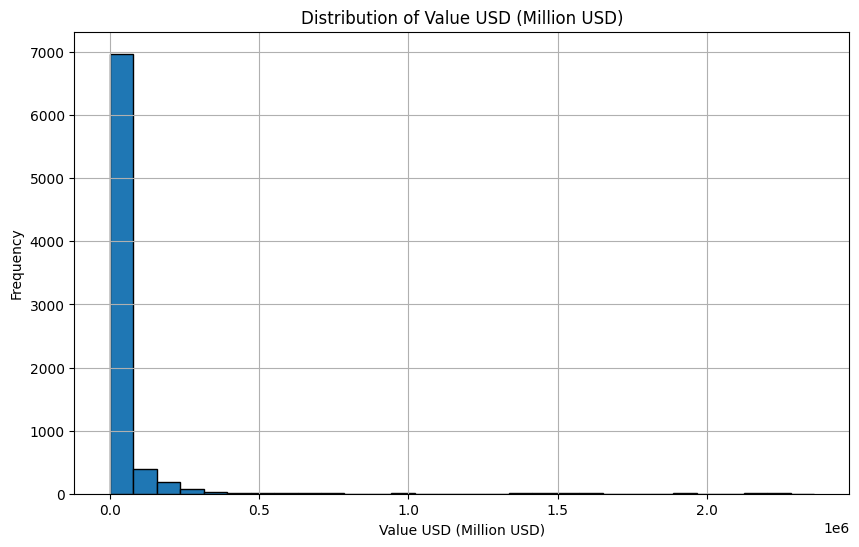

In [19]:
import matplotlib.pyplot as plt

# Load VA_NewUpdated.csv
va_data = pd.read_csv('VA_NewUpdated.csv')

# Define the column to check for outliers
value_column = 'Value USD (Million USD)'
values = va_data[value_column]

# Visualize distribution of 'Value USD (Million USD)'
plt.figure(figsize=(10, 6))
plt.hist(values, bins=30, edgecolor='black')
plt.title(f'Distribution of {value_column}')
plt.xlabel(value_column)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


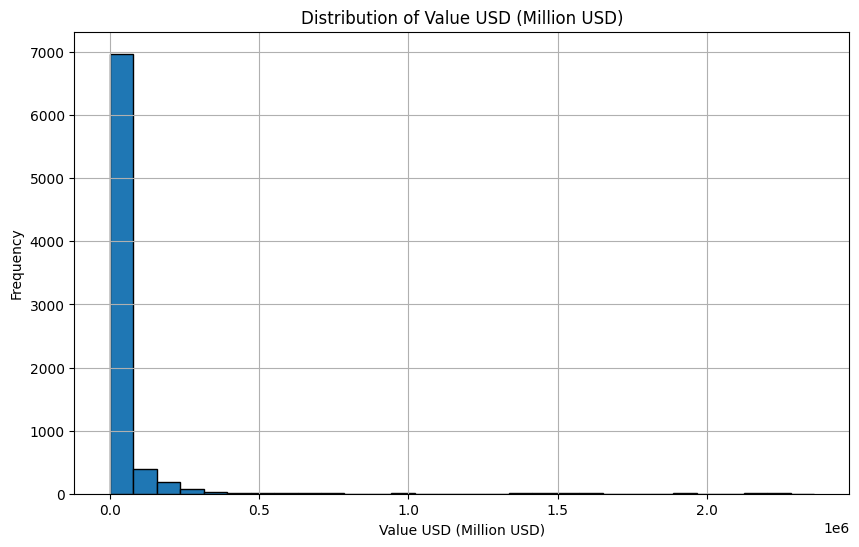

Bin 1: 0.34 - 78640.30 	 Count: 6972
Bin 2: 78640.30 - 157280.25 	 Count: 393
Bin 3: 157280.25 - 235920.21 	 Count: 184
Bin 4: 235920.21 - 314560.17 	 Count: 79
Bin 5: 314560.17 - 393200.12 	 Count: 31
Bin 6: 393200.12 - 471840.08 	 Count: 11
Bin 7: 471840.08 - 550480.04 	 Count: 13
Bin 8: 550480.04 - 629119.99 	 Count: 10
Bin 9: 629119.99 - 707759.95 	 Count: 7
Bin 10: 707759.95 - 786399.91 	 Count: 14
Bin 11: 786399.91 - 865039.86 	 Count: 2
Bin 12: 865039.86 - 943679.82 	 Count: 3
Bin 13: 943679.82 - 1022319.78 	 Count: 10
Bin 14: 1022319.78 - 1100959.73 	 Count: 0
Bin 15: 1100959.73 - 1179599.69 	 Count: 1
Bin 16: 1179599.69 - 1258239.65 	 Count: 1
Bin 17: 1258239.65 - 1336879.60 	 Count: 2
Bin 18: 1336879.60 - 1415519.56 	 Count: 9
Bin 19: 1415519.56 - 1494159.52 	 Count: 6
Bin 20: 1494159.52 - 1572799.47 	 Count: 5
Bin 21: 1572799.47 - 1651439.43 	 Count: 8
Bin 22: 1651439.43 - 1730079.39 	 Count: 1
Bin 23: 1730079.39 - 1808719.34 	 Count: 1
Bin 24: 1808719.34 - 1887359.30 	 Coun

In [20]:
import numpy as np

# Define the column to check for outliers
value_column = 'Value USD (Million USD)'
values = va_data[value_column]

# Plot histogram to visualize distribution
plt.figure(figsize=(10, 6))
plt.hist(values, bins=30, edgecolor='black')
plt.title(f'Distribution of {value_column}')
plt.xlabel(value_column)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate and print histogram data
hist, bin_edges = np.histogram(values, bins=30)
for i, (count, bin_edge) in enumerate(zip(hist, bin_edges)):
    if i < len(bin_edges) - 1:
        print(f"Bin {i+1}: {bin_edge:.2f} - {bin_edges[i+1]:.2f} \t Count: {count}")

This distribution is skewed to the right/positive skewness. There are more lower values and fewer higher values. These may be poor vs rich countries, large vs small.

In [21]:
# Define the column to check for outliers
value_column = 'Value USD (Million USD)'
values = va_data[value_column]

# Calculate quartiles and IQR
Q1 = values.quantile(0.25)
Q3 = values.quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_df = va_data[(values < lower_bound) | (values > upper_bound)]

# Print unique country names of the outliers
unique_countries = outliers_df['Country'].unique()
print("Unique countries with outliers in 'Value USD (Million USD)':")
for country in unique_countries:
    print(country)

Unique countries with outliers in 'Value USD (Million USD)':
Australia
Austria
Belgium
Canada
France
Germany
India
Indonesia
Ireland
Italy
Japan
Korea
Malaysia
Mexico
Nigeria
Norway
Pakistan
Philippines
Poland
Qatar
Saudi Arabia
Singapore
Spain
Sweden
Switzerland
Thailand
United Kingdom
United States


At this juncture we will retain outliers as it is a representation of real-world data points and helps to maintain transparency and clarity. A sensitivity analysis may be performed later to assess how sensitive the results are to the presence of outliers. If necessary a data transformation may be needed or robust statistical methods that are less sensitive to outliers (using median or trimmed mean).

In [22]:
# Load Ind_Updated.csv
ind_data = pd.read_csv('Ind_Updated.csv')

# Print columns
print("Columns in Ind_Updated.csv:")
print(ind_data.columns.tolist())

Columns in Ind_Updated.csv:
['Country', 'Year', 'ISIC division description', 'Indicator', 'Value', 'Unit']


In [23]:
# Load the data
ind_data = pd.read_csv('Ind_Updated.csv')

# Define the column to check for outliers
value_column = 'Value'

# Calculate quartiles and IQR
Q1 = ind_data[value_column].quantile(0.25)
Q3 = ind_data[value_column].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ind_data[(ind_data[value_column] < lower_bound) | (ind_data[value_column] > upper_bound)]

# Create bins for outlier analysis
bins = [-float('inf'), lower_bound, Q1, Q3, upper_bound, float('inf')]
bin_labels = ['Bin 1', 'Bin 2', 'Bin 3', 'Bin 4', 'Bin 5']

# Assign outliers to bins
outliers['Bin'] = pd.cut(outliers[value_column], bins=bins, labels=bin_labels, include_lowest=True)

# Count outliers in each bin
bin_counts = outliers['Bin'].value_counts().sort_index()

# Print bin counts
print("Outlier Counts by Bin:")
for bin_label, count in bin_counts.items():
    print(f"{bin_label}: {count}")

# Print the outliers in each bin for further investigation
for bin_label in bin_labels:
    if bin_label in bin_counts.index:
        print(f"\nOutliers in {bin_label}:")
        print(outliers[outliers['Bin'] == bin_label][[value_column]])

# Print unique countries with outliers
unique_countries = outliers['Country'].unique()
print("\nUnique countries with outliers:")
print(unique_countries)

Outlier Counts by Bin:
Bin 1: 12
Bin 2: 0
Bin 3: 0
Bin 4: 0
Bin 5: 873

Outliers in Bin 1:
         Value
491     -11.87
569    -217.68
1384 -10658.41
1680   -370.55
1692   -318.75
1704   -229.95
1716   -197.59
1728   -170.57
1740   -143.88
1752   -106.06
3037    -25.17
3115   -557.64

Outliers in Bin 2:
Empty DataFrame
Columns: [Value]
Index: []

Outliers in Bin 3:
Empty DataFrame
Columns: [Value]
Index: []

Outliers in Bin 4:
Empty DataFrame
Columns: [Value]
Index: []

Outliers in Bin 5:
      Value
136   11.96
139   10.36
140   19.00
141   43.25
143   12.44
...     ...
6071  21.09
6072  22.33
6073   7.92
6074  11.55
6075  17.46

[873 rows x 1 columns]

Unique countries with outliers:
['Austria' 'Belgium' 'Bulgaria' 'Canada' 'Chile' 'Colombia' 'Croatia'
 'Cyprus' 'Czech Republic' 'Denmark' 'Estonia' 'Finland' 'France'
 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Japan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Mexico' 'Namibia' 'Norway' 'Poland' 'Portugal'
 'Romania' 'Serbia'

<ipython-input-23-611253fe9be0>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['Bin'] = pd.cut(outliers[value_column], bins=bins, labels=bin_labels, include_lowest=True)


At this juncture we will retain outliers as it is a representation of real-world data points and helps to maintain transparency and clarity. A sensitivity analysis may be performed later to assess how sensitive the results are to the presence of outliers. If necessary a data transformation may be needed or robust statistical methods that are less sensitive to outliers (using median or trimmed mean).

**3. Exploratory Data Analysis:**

In [24]:
# Load VA_NewUpdated.csv
va_data = pd.read_csv('VA_NewUpdated.csv')

# Summary Statistics
summary_stats_va = va_data.describe()
print("Summary Statistics for VA_NewUpdated.csv:")
print(summary_stats_va)

Summary Statistics for VA_NewUpdated.csv:
              Year  Value USD (Million USD)
count  7785.000000             7.785000e+03
mean   2017.570713             4.270331e+04
std       1.815533             1.666048e+05
min    2015.000000             3.400000e-01
25%    2016.000000             1.091350e+03
50%    2018.000000             5.044810e+03
75%    2019.000000             2.312337e+04
max    2021.000000             2.359199e+06


 The mean year is approximately 2017.57 and standard deviation is ~ 1.82 years (a wide range of values from very low to very high). The Value USD (Million USD) column indicates values ranging from 0.34 to 2,359,199 million USD, with a mean of approximately 42,703.31 USD million and a standard deviation of about 166,604.8 USD million.

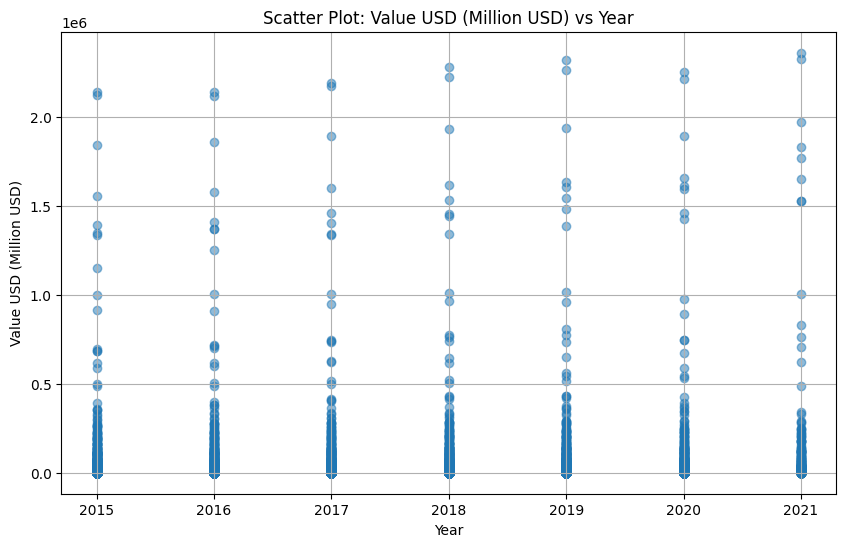

In [25]:
import matplotlib.pyplot as plt

# Scatter plot for Value USD (Million USD) vs Year
plt.figure(figsize=(10, 6))
plt.scatter(va_data['Year'], va_data['Value USD (Million USD)'], alpha=0.5)
plt.title('Scatter Plot: Value USD (Million USD) vs Year')
plt.xlabel('Year')
plt.ylabel('Value USD (Million USD)')
plt.grid(True)
plt.show()


In [26]:
# Correlation matrix for VA_NewUpdated.csv
# Select only numeric columns for correlation analysis
numeric_columns = va_data.select_dtypes(include=['float64', 'int64'])

# Correlation matrix for numeric columns
correlation_va = numeric_columns.corr()
print("\nCorrelation Matrix for VA_NewUpdated.csv:")
print(correlation_va)


Correlation Matrix for VA_NewUpdated.csv:
                             Year  Value USD (Million USD)
Year                     1.000000                 0.038467
Value USD (Million USD)  0.038467                 1.000000


The correlation between the "Year" and "Value USD (Million USD)" is approximately 0.038467. This suggests a very weak positive linear relationship between the year and the value in USD (negligible).

The correlation of a variable with itself is always 1, indicating a perfect positive linear relationship (since it is identical); the correlation of the "Value USD (Million USD)" with itself is also 1, indicating a perfect positive linear relationship.

Weak Correlation and no strong patterns. The year alone is not a significant predictor of the value in USD.

In [27]:
# Grouping by Country and calculating mean Value USD (Million USD)
grouped_va = va_data.groupby('Country')['Value USD (Million USD)'].mean()
print("\nGrouped Mean Value USD (Million USD) by Country:")
print(grouped_va)



Grouped Mean Value USD (Million USD) by Country:
Country
Albania                   574.931111
Australia               68785.026429
Austria                 17757.911571
Belgium                 21412.779857
Benin                     602.160842
                           ...      
Trinidad and Tobago      1212.901711
United Kingdom         140505.439340
United States          930232.235214
Viet Nam                16755.893333
Zambia                   1210.419231
Name: Value USD (Million USD), Length: 74, dtype: float64


In [28]:
# Load Ind_Updated.csv
ind_data = pd.read_csv('Ind_Updated.csv')

# Summary Statistics
summary_stats_ind = ind_data.describe()
print("\nSummary Statistics for Ind_Updated.csv:")
print(summary_stats_ind)


Summary Statistics for Ind_Updated.csv:
              Year         Value
count  6123.000000   6123.000000
mean   2017.499755      2.419435
std       1.751499    137.650104
min    2015.000000 -10658.410000
25%    2016.000000      0.150000
50%    2017.000000      0.750000
75%    2019.000000      3.220000
max    2021.000000    553.540000


The average year is ~ 2017.5 wwith a standard deviation of 1.75 years meaning the data is spread out over a few years around the mean.

Value: The average is ~2.42 with a standard deviation 13765 indicating a high level of variabilitly in the data. Values range from -10658.41 to 553.54 - need to check for negative values (it is possible but unusual).

In [29]:
# Identify negative values in the 'Value' column
negative_values = ind_data[ind_data['Value'] < 0]

# Count the number of negative values
negative_value_count = negative_values['Value'].count()

# Print the count of negative values
print(f"Count of negative values in 'Value': {negative_value_count}")

# Print the 'Value' column for rows with negative values
print("\nNegative values in 'Value':")
print(negative_values['Value'])

# Print the unique countries with negative values
unique_countries_with_negative_values = negative_values['Country'].unique()
print("\nUnique countries with negative values:")
print(unique_countries_with_negative_values)

Count of negative values in 'Value': 12

Negative values in 'Value':
491       -11.87
569      -217.68
1384   -10658.41
1680     -370.55
1692     -318.75
1704     -229.95
1716     -197.59
1728     -170.57
1740     -143.88
1752     -106.06
3037      -25.17
3115     -557.64
Name: Value, dtype: float64

Unique countries with negative values:
['Bulgaria' 'Czech Republic' 'Estonia' 'Italy']


We will keep the negative values because they reflect real-world variability and anomalies in industrial data, which are crucial for understanding economic fluctuations and sector-specific challenges. Analyzing these values helps capture nuanced insights into industrial performance across different contexts and timeframes, enriching the robustness of our analytical findings.

In [32]:
# Grouping by Year and calculating mean Value
grouped_ind = ind_data.groupby('Year')['Value'].mean()
print("\nGrouped Mean Value by Year:")
print(grouped_ind)



Grouped Mean Value by Year:
Year
2015     3.885444
2016     3.932769
2017     3.916547
2018     4.621506
2019     4.615460
2020     3.019273
2021   -49.529838
Name: Value, dtype: float64


Merge two datasets and explore.

In [33]:
# Load the cleaned datasets
va_data = pd.read_csv('VA_NewUpdated.csv')
ind_data = pd.read_csv('Ind_Updated.csv')

# Merge datasets on 'Country' and 'Year'
merged_data = pd.merge(va_data, ind_data, on=['Country', 'Year'], suffixes=('_va', '_ind'))

# Save the merged dataset to a new CSV file
merged_data.to_csv('merged.csv', index=False)

# Display the first few rows of the merged dataset
print(merged_data.head())

   Country  Year                 ISIC Division Desc               Measure  \
0  Albania  2015  Agriculture, forestry and fishing  Constant 2015 prices   
1  Albania  2015  Agriculture, forestry and fishing  Constant 2015 prices   
2  Albania  2015  Agriculture, forestry and fishing  Constant 2015 prices   
3  Albania  2015  Agriculture, forestry and fishing  Constant 2015 prices   
4  Albania  2015  Agriculture, forestry and fishing  Constant 2015 prices   

   Value USD (Million USD)          ISIC division description  \
0                  2252.34  Agriculture, forestry and fishing   
1                  2252.34               Mining and quarrying   
2                  2252.34                       Construction   
3                  2252.34  Agriculture, forestry and fishing   
4                  2252.34               Mining and quarrying   

                          Indicator  Value                Unit  
0  Per value added carbon intensity   0.04  kgCO2/USD PPP 2015  
1  Per value add

In [34]:
# Summary statistics
summary_stats_merged = merged_data.describe()
print("\nSummary Statistics for Merged Data:")
print(summary_stats_merged)



Summary Statistics for Merged Data:
                Year  Value USD (Million USD)          Value
count  116319.000000             1.163190e+05  116319.000000
mean     2017.506727             6.268163e+04       2.396136
std         1.755857             2.249590e+05     141.192161
min      2015.000000             3.400000e-01  -10658.410000
25%      2016.000000             1.626180e+03       0.160000
50%      2017.000000             6.609110e+03       0.780000
75%      2019.000000             2.955544e+04       3.290000
max      2021.000000             2.359199e+06     553.540000


Year and Value stays relatively the same.

Value USD: Count increased suggesting a successful merge. Mean is 62,681.63 is higher (presence of high value entries). SD 224,959 is relatvelyl large (suggests wide range of economic activity values). The minimum is near zero ans max is 2,359,199.

In [37]:
# Load the merged dataset
merged_data = pd.read_csv('merged.csv')

# Select only numerical columns for correlation matrix
numerical_data = merged_data.select_dtypes(include=['float64', 'int64'])

# Correlation matrix for merged data
correlation_merged = numerical_data.corr()
print("\nCorrelation Matrix for Merged Data:")
print(correlation_merged)



Correlation Matrix for Merged Data:
                             Year  Value USD (Million USD)     Value
Year                     1.000000                 0.026414 -0.024044
Value USD (Million USD)  0.026414                 1.000000  0.003283
Value                   -0.024044                 0.003283  1.000000


Weak positive correlation between Year and Value USD.

Weak negative correlation between Year and Value.

Weak positive correlation between Value USD and Value

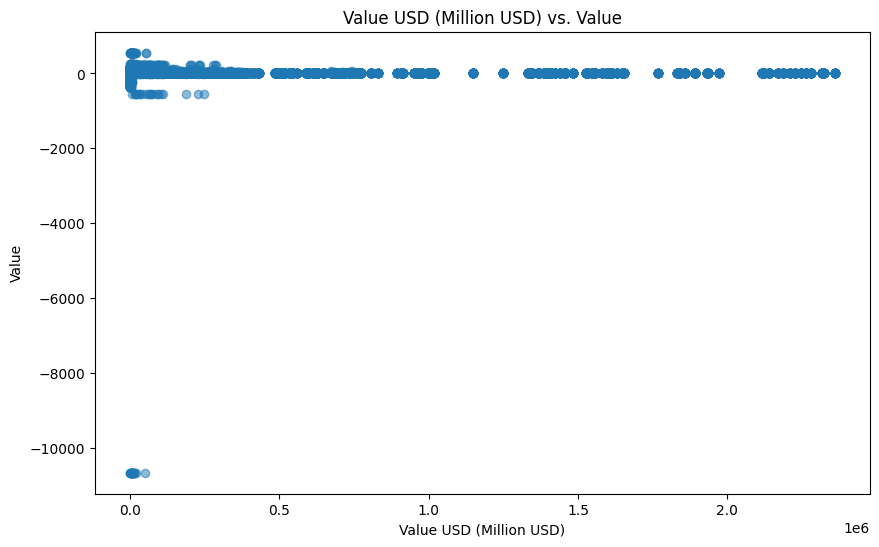

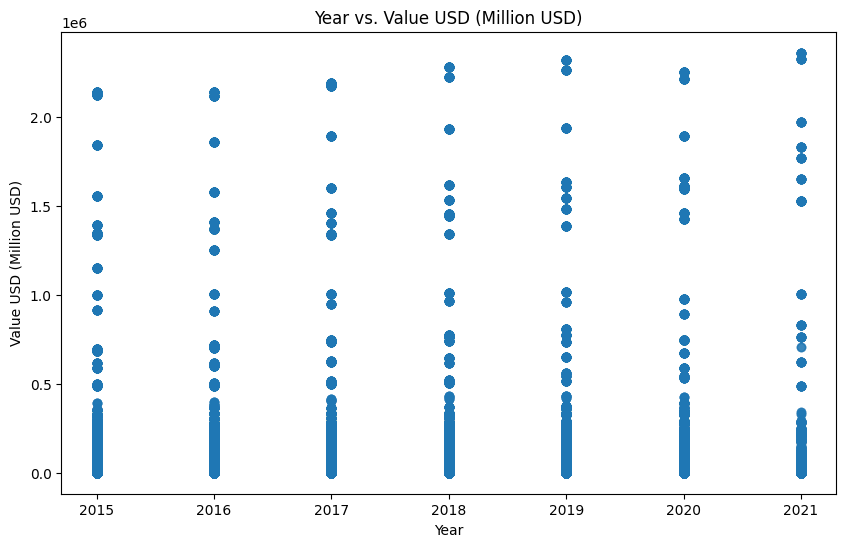

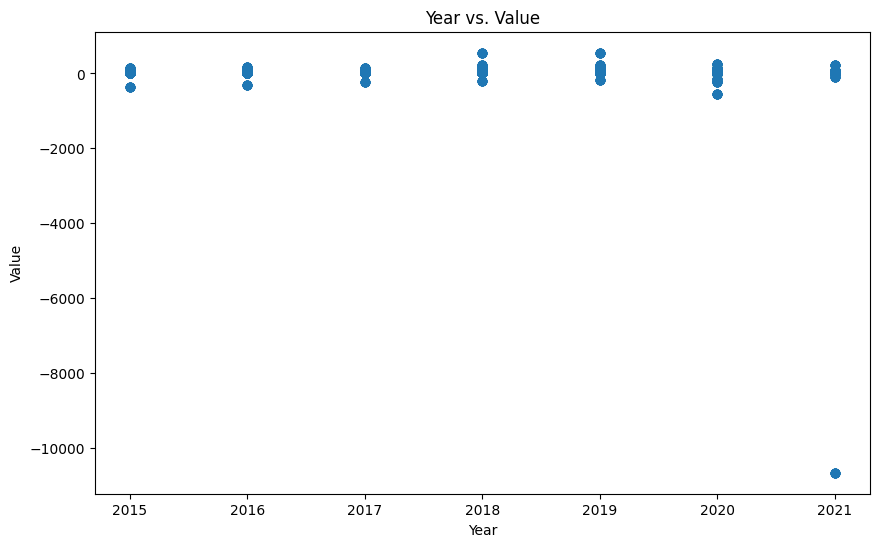

In [39]:
# Scatter plot: Value USD (Million USD) vs. Value
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Value USD (Million USD)'], merged_data['Value'], alpha=0.5)
plt.title('Value USD (Million USD) vs. Value')
plt.xlabel('Value USD (Million USD)')
plt.ylabel('Value')
plt.show()

# Scatter plot: Year vs. Value USD (Million USD)
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Year'], merged_data['Value USD (Million USD)'], alpha=0.5)
plt.title('Year vs. Value USD (Million USD)')
plt.xlabel('Year')
plt.ylabel('Value USD (Million USD)')
plt.show()

# Scatter plot: Year vs. Value
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Year'], merged_data['Value'], alpha=0.5)
plt.title('Year vs. Value')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()


In [41]:
# Ensure columns are numeric where applicable
numeric_columns = ['Year', 'Value USD (Million USD)', 'Value']
merged_data[numeric_columns] = merged_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Grouping by Country and calculating mean values
grouped_by_country = merged_data.groupby('Country')[numeric_columns].mean()
print("\nGrouped Mean Values by Country:")
print(grouped_by_country)

# Grouping by Year and calculating mean values
grouped_by_year = merged_data.groupby('Year')[numeric_columns].mean()
print("\nGrouped Mean Values by Year:")
print(grouped_by_year)



Grouped Mean Values by Country:
                            Year  Value USD (Million USD)     Value
Country                                                            
Albania              2016.000000               574.931111  0.468889
Australia            2017.769231             68383.127521  1.898462
Austria              2017.769231             17735.568692  5.128107
Belgium              2017.670732             21320.774213  6.993049
Benin                2017.125000               607.612829  0.062500
...                          ...                      ...       ...
Trinidad and Tobago  2016.500000              1212.901711  1.040000
United Kingdom       2017.027439            137305.808521  4.370023
United States        2017.769231            925452.393231  4.076490
Viet Nam             2017.500000             16755.893333  0.523333
Zambia               2016.978022              1210.419231  0.457546

[74 rows x 3 columns]

Grouped Mean Values by Year:
        Year  Value USD (Milli

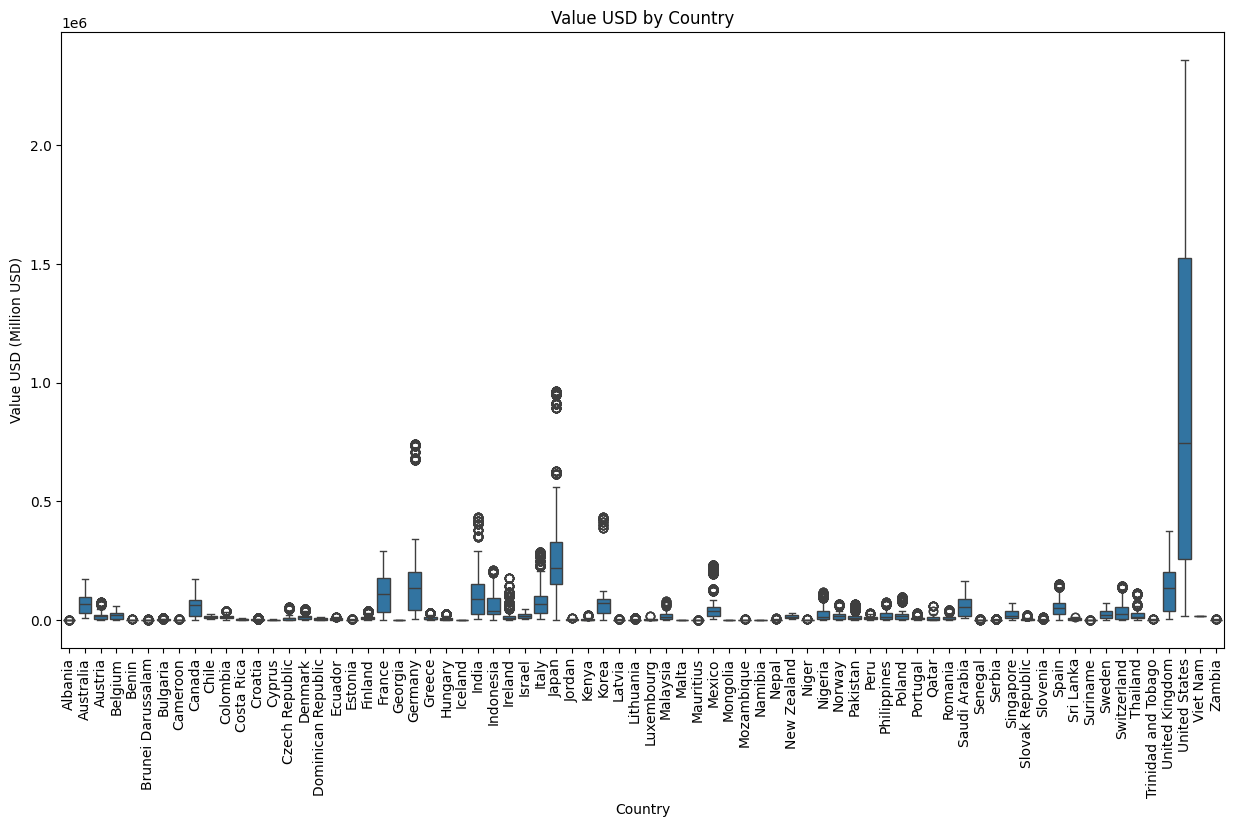

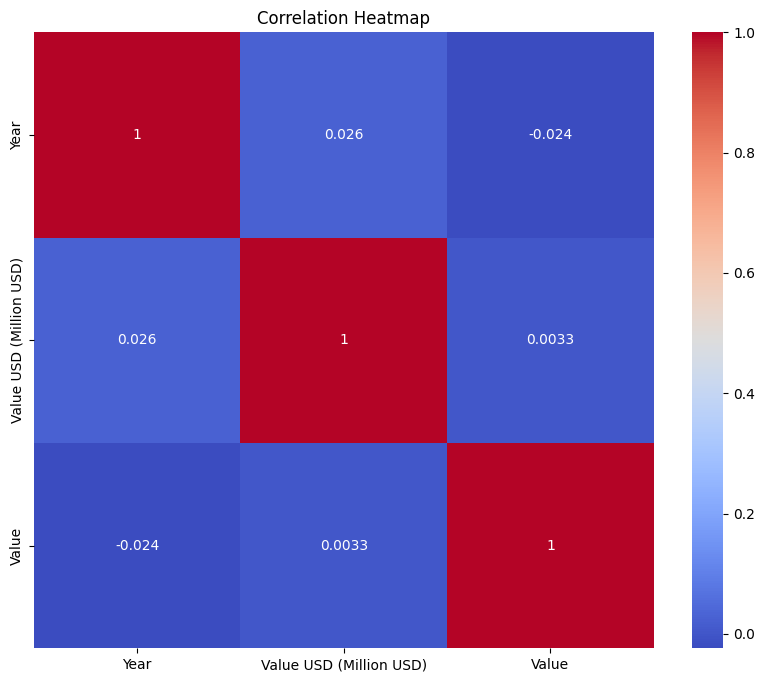

In [42]:
import seaborn as sns

# Box plot of Value USD by Country
plt.figure(figsize=(15, 8))
sns.boxplot(x='Country', y='Value USD (Million USD)', data=merged_data)
plt.xticks(rotation=90)
plt.title('Value USD by Country')
plt.show()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_merged, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [43]:
print(merged_data.columns)


Index(['Country', 'Year', 'ISIC Division Desc', 'Measure',
       'Value USD (Million USD)', 'ISIC division description', 'Indicator',
       'Value', 'Unit'],
      dtype='object')


In [44]:
unique_isic_divisions = merged_data['ISIC division description'].unique()
print("Unique ISIC Division Descriptions:")
print(unique_isic_divisions)


Unique ISIC Division Descriptions:
['Agriculture, forestry and fishing' 'Mining and quarrying' 'Construction'
 'Manufacture of food products, beverages and tobacco products'
 'Manufacture of textiles, wearing apparel, leather and related products'
 'Manufacture of wood and of products of wood and cork, except furniture; manufacture of articles of straw and plaiting materials'
 'Manufacture of paper products and printing'
 'Manufacture of coke and refined petroleum products'
 'Manufacturing of chemicals and pharmaceutical products'
 'Manufacture of other non-metallic mineral products'
 'Manufacture of basic metals'
 'Manufacture of fabricated metal products, machinery and equipment'
 'Manufacture of transport equipment'
 'Manufacturing (excluding manufacture of coke and refined petroleum products)'
 'Services (with Public administration and defence; compulsory social security - 84)'
 'Services (without Public administration and defence; compulsory social security - 84)']


In [46]:
isic_counts = merged_data['ISIC division description'].value_counts()
print("Counts of each ISIC Division Description:")
print(isic_counts)

Counts of each ISIC Division Description:
ISIC division description
Agriculture, forestry and fishing                                                                                                  14266
Mining and quarrying                                                                                                               12633
Construction                                                                                                                       12443
Manufacture of food products, beverages and tobacco products                                                                        8361
Manufacture of textiles, wearing apparel, leather and related products                                                              8050
Manufacture of transport equipment                                                                                                  7975
Manufacture of other non-metallic mineral products                                                            

In [47]:
grouped_by_isic = merged_data.groupby('ISIC division description').agg({
    'Value USD (Million USD)': 'mean',
    'Value': 'mean'
})
print("\nGrouped Mean Values by ISIC Division Desc:")
print(grouped_by_isic)



Grouped Mean Values by ISIC Division Desc:
                                                    Value USD (Million USD)  \
ISIC division description                                                     
Agriculture, forestry and fishing                              43655.646276   
Construction                                                   48386.813579   
Manufacture of basic metals                                    63993.610777   
Manufacture of coke and refined petroleum products             81083.125622   
Manufacture of fabricated metal products, machi...             61446.402488   
Manufacture of food products, beverages and tob...             60494.573150   
Manufacture of other non-metallic mineral products             63196.696931   
Manufacture of paper products and printing                     62107.446064   
Manufacture of textiles, wearing apparel, leath...             56061.763852   
Manufacture of transport equipment                             62771.575713   
Manufact

In [48]:
unique_indicators = merged_data['Indicator'].unique()
print("\nUnique Indicators:")
print(unique_indicators)



Unique Indicators:
['Per value added carbon intensity' 'Per value added energy intensity']


In [49]:
indicator_stats = merged_data.groupby('Indicator')['Value'].describe()
print("\nSummary Statistics for Value by Indicator:")
print(indicator_stats)



Summary Statistics for Value by Indicator:
                                    count      mean         std       min  \
Indicator                                                                   
Per value added carbon intensity  56243.0  0.488683    1.424383    -25.17   
Per value added energy intensity  60076.0  4.181889  196.444270 -10658.41   

                                   25%   50%   75%     max  
Indicator                                                   
Per value added carbon intensity  0.06  0.18  0.50   32.73  
Per value added energy intensity  0.94  2.97  9.02  553.54  


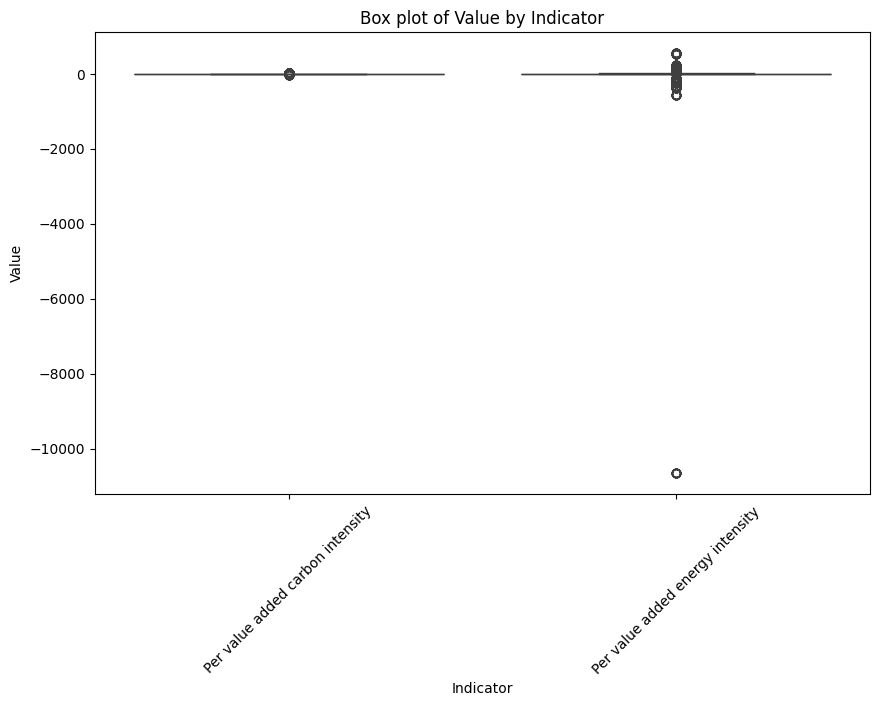

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Box plot of 'Value' by 'Indicator'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Indicator', y='Value', data=merged_data)
plt.title('Box plot of Value by Indicator')
plt.xticks(rotation=45)
plt.show()


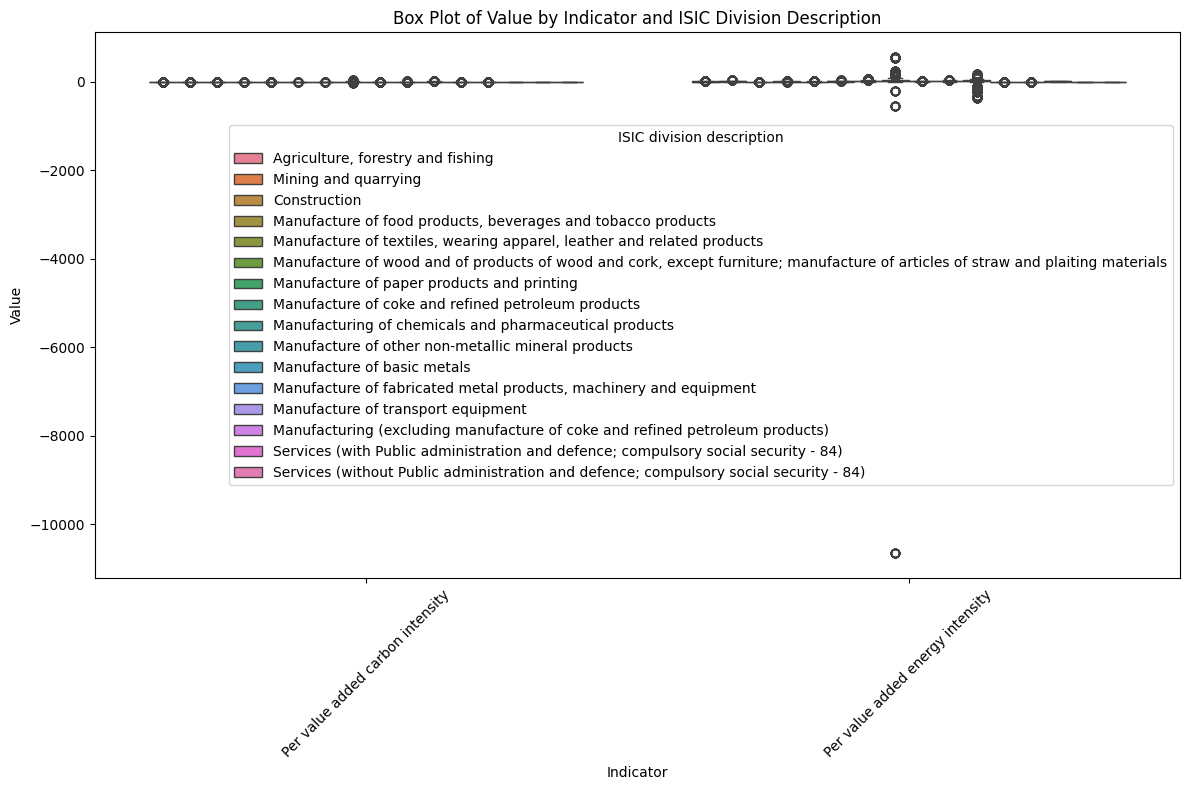

In [51]:
# Box Plots by Indicator and ISIC division description
# Box plot of Value by Indicator and ISIC Division Description
plt.figure(figsize=(12, 8))
sns.boxplot(x='Indicator', y='Value', hue='ISIC division description', data=merged_data)
plt.title('Box Plot of Value by Indicator and ISIC Division Description')
plt.xlabel('Indicator')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

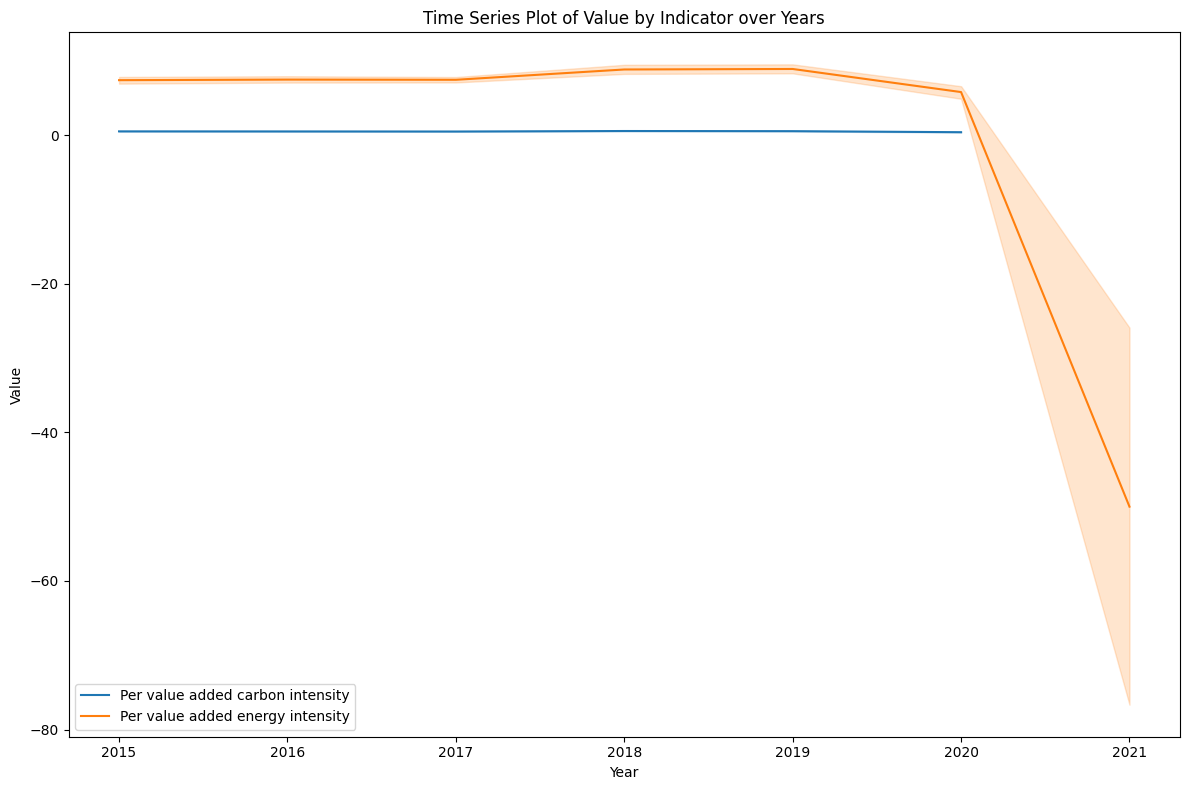

In [52]:
# Time Series Analysis
# Time series plot of Value over the years for each Indicator
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Value', hue='Indicator', data=merged_data)
plt.title('Time Series Plot of Value by Indicator over Years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


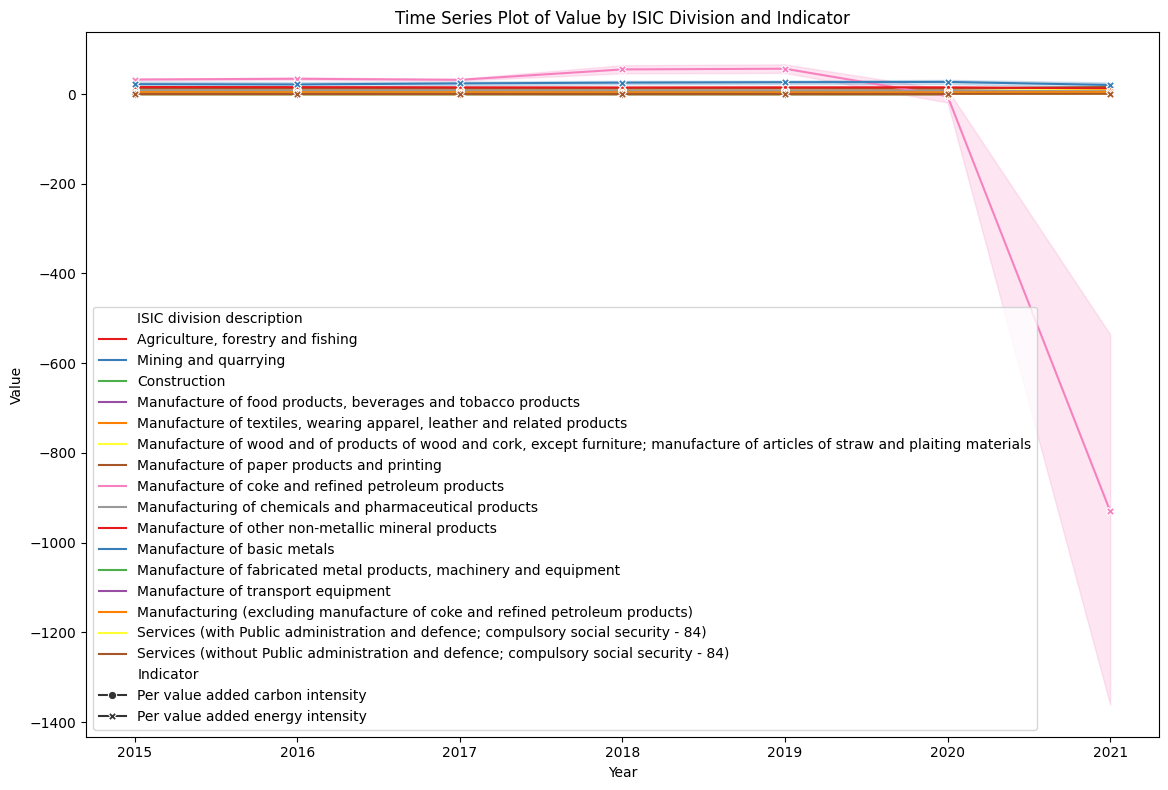

In [67]:
# Time Series Analysis
# Filter data for relevant indicators
indicators_of_interest = ['Per value added energy intensity', 'Per value added carbon intensity']
filtered_data = merged_data[merged_data['Indicator'].isin(indicators_of_interest)]

# Time series plot of Value over the years for each Indicator and ISIC Division Description
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Value', hue='ISIC division description', style='Indicator', markers=True, dashes=False, data=filtered_data, palette='Set1')
plt.title('Time Series Plot of Value by ISIC Division and Indicator')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

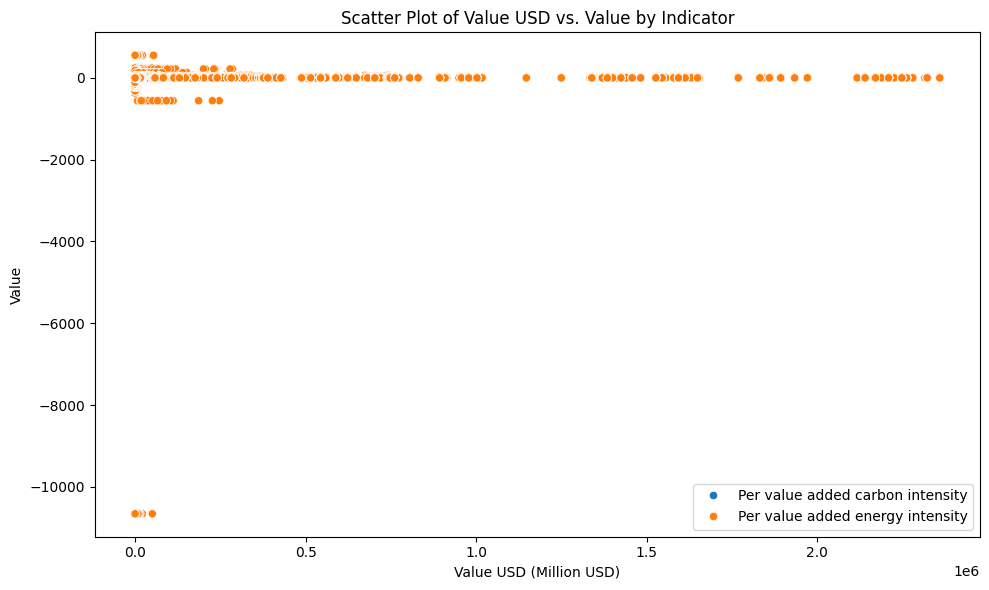

In [53]:
# Comparison of Value USD and Value
# Scatter plot of Value USD vs. Value by Indicator
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Value USD (Million USD)', y='Value', hue='Indicator', data=merged_data)
plt.title('Scatter Plot of Value USD vs. Value by Indicator')
plt.xlabel('Value USD (Million USD)')
plt.ylabel('Value')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [54]:
# Grouped Analysis by Unit
# Grouped analysis by Unit
unit_stats = merged_data.groupby('Unit')['Value'].describe()
print("\nSummary Statistics for Value by Unit:")
print(unit_stats)



Summary Statistics for Value by Unit:
                      count      mean         std       min   25%   50%   75%  \
Unit                                                                            
MJ/USD PPP 2015     60076.0  4.181889  196.444270 -10658.41  0.94  2.97  9.02   
kgCO2/USD PPP 2015  56243.0  0.488683    1.424383    -25.17  0.06  0.18  0.50   

                       max  
Unit                        
MJ/USD PPP 2015     553.54  
kgCO2/USD PPP 2015   32.73  


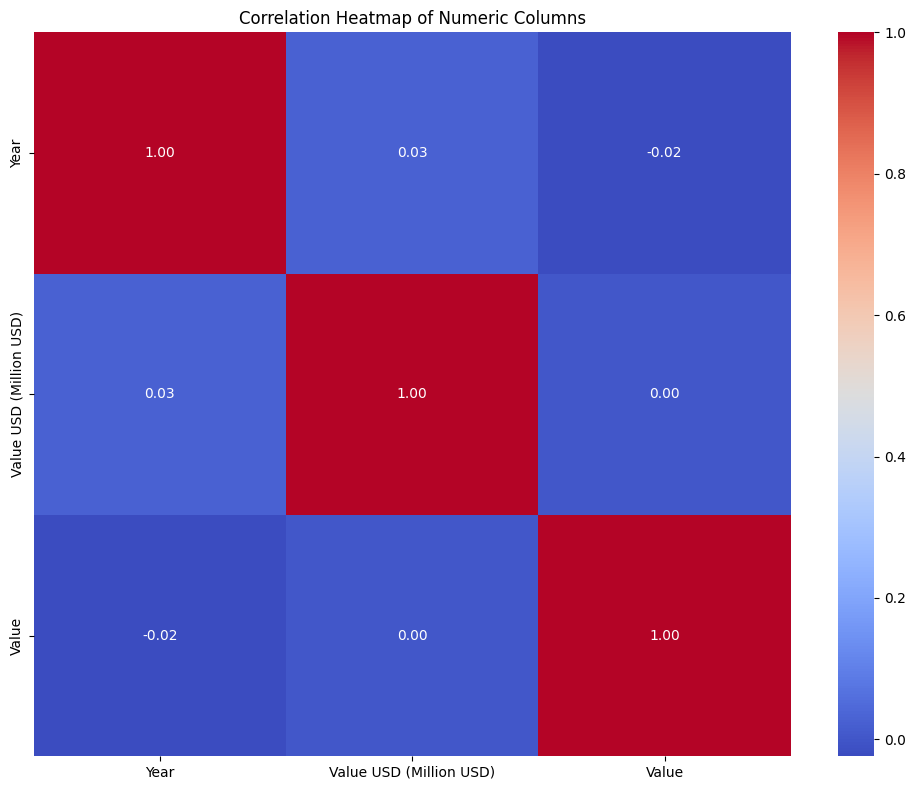

In [65]:
# Correlation Heatmap
# Select numeric columns for correlation heatmap
numeric_cols = merged_data.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap including all numeric columns
plt.figure(figsize=(10, 8))
correlation = numeric_cols.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Columns')
plt.tight_layout()
plt.show()


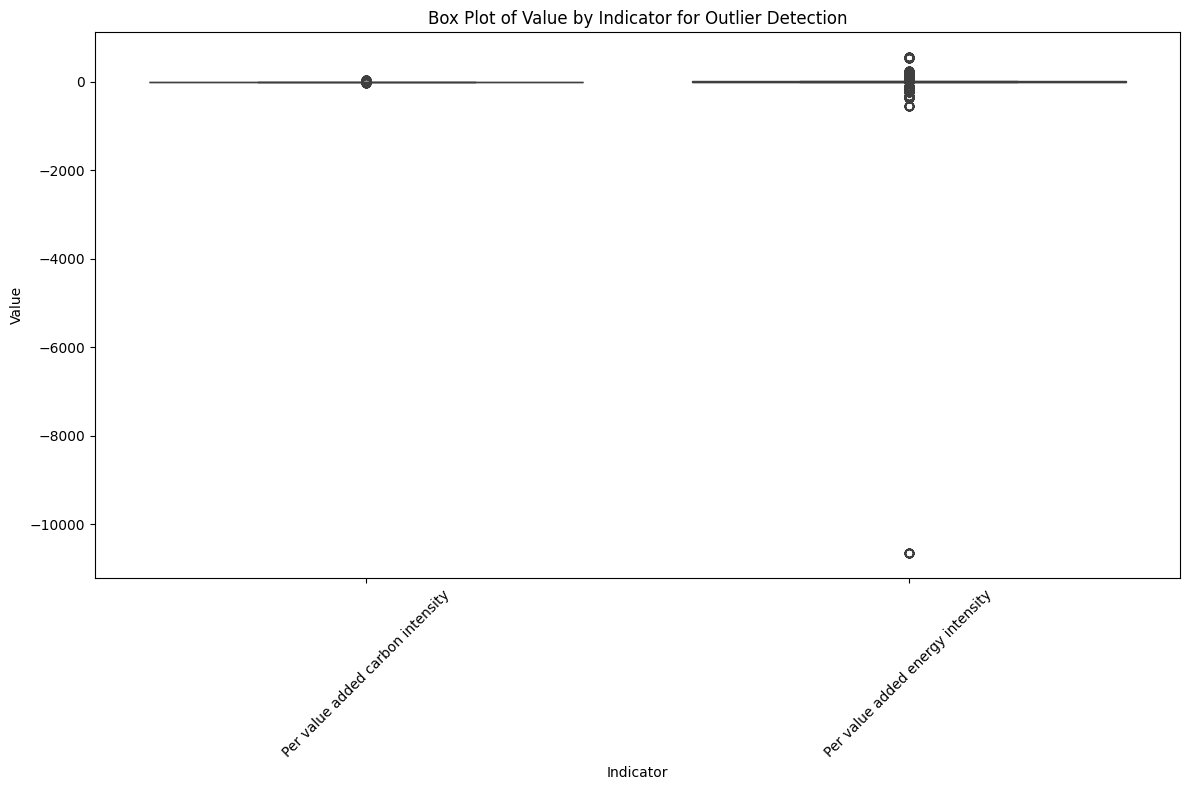

In [56]:
#Outlier Detection
# Box plot to identify outliers in 'Value' for each Indicator
plt.figure(figsize=(12, 8))
sns.boxplot(x='Indicator', y='Value', data=merged_data)
plt.title('Box Plot of Value by Indicator for Outlier Detection')
plt.xlabel('Indicator')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


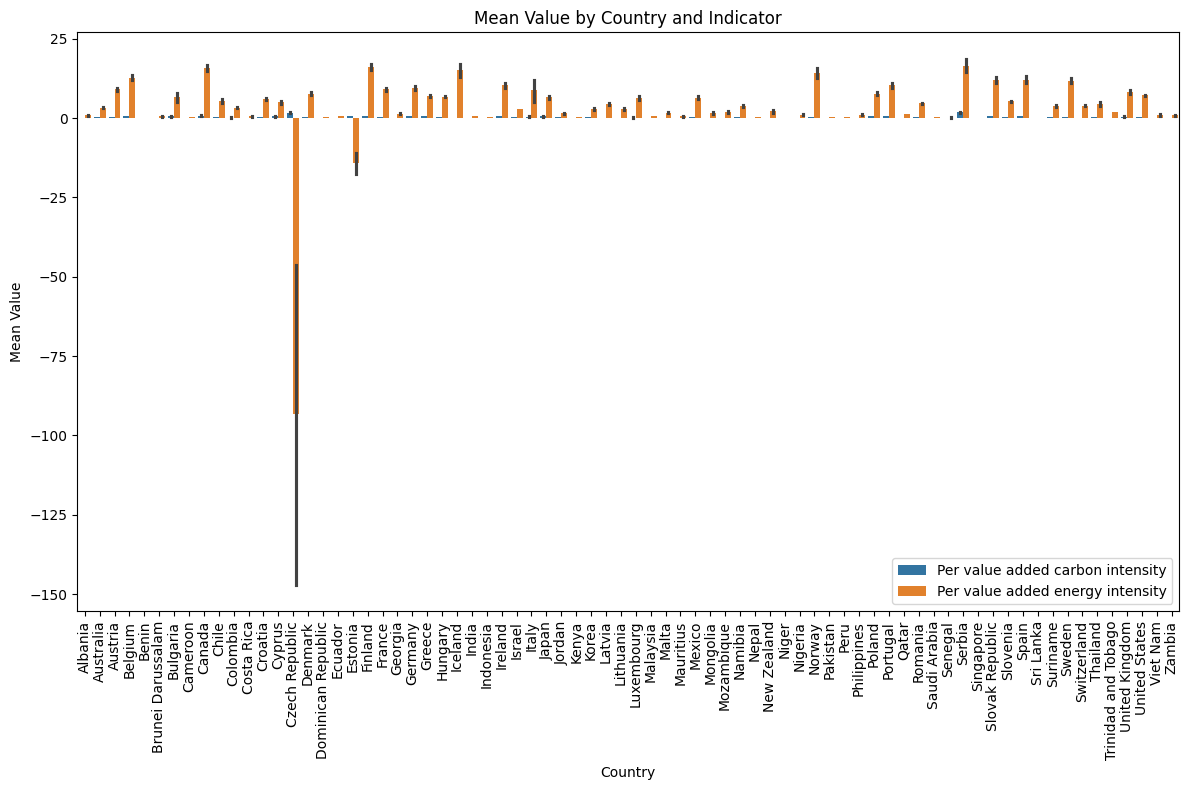

In [57]:
# Comparative Analysis Across Countries
# Bar plot to compare mean 'Value' across countries for each Indicator
plt.figure(figsize=(12, 8))
sns.barplot(x='Country', y='Value', hue='Indicator', data=merged_data)
plt.title('Mean Value by Country and Indicator')
plt.xlabel('Country')
plt.ylabel('Mean Value')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


<ipython-input-58-b9753842a7f9>:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


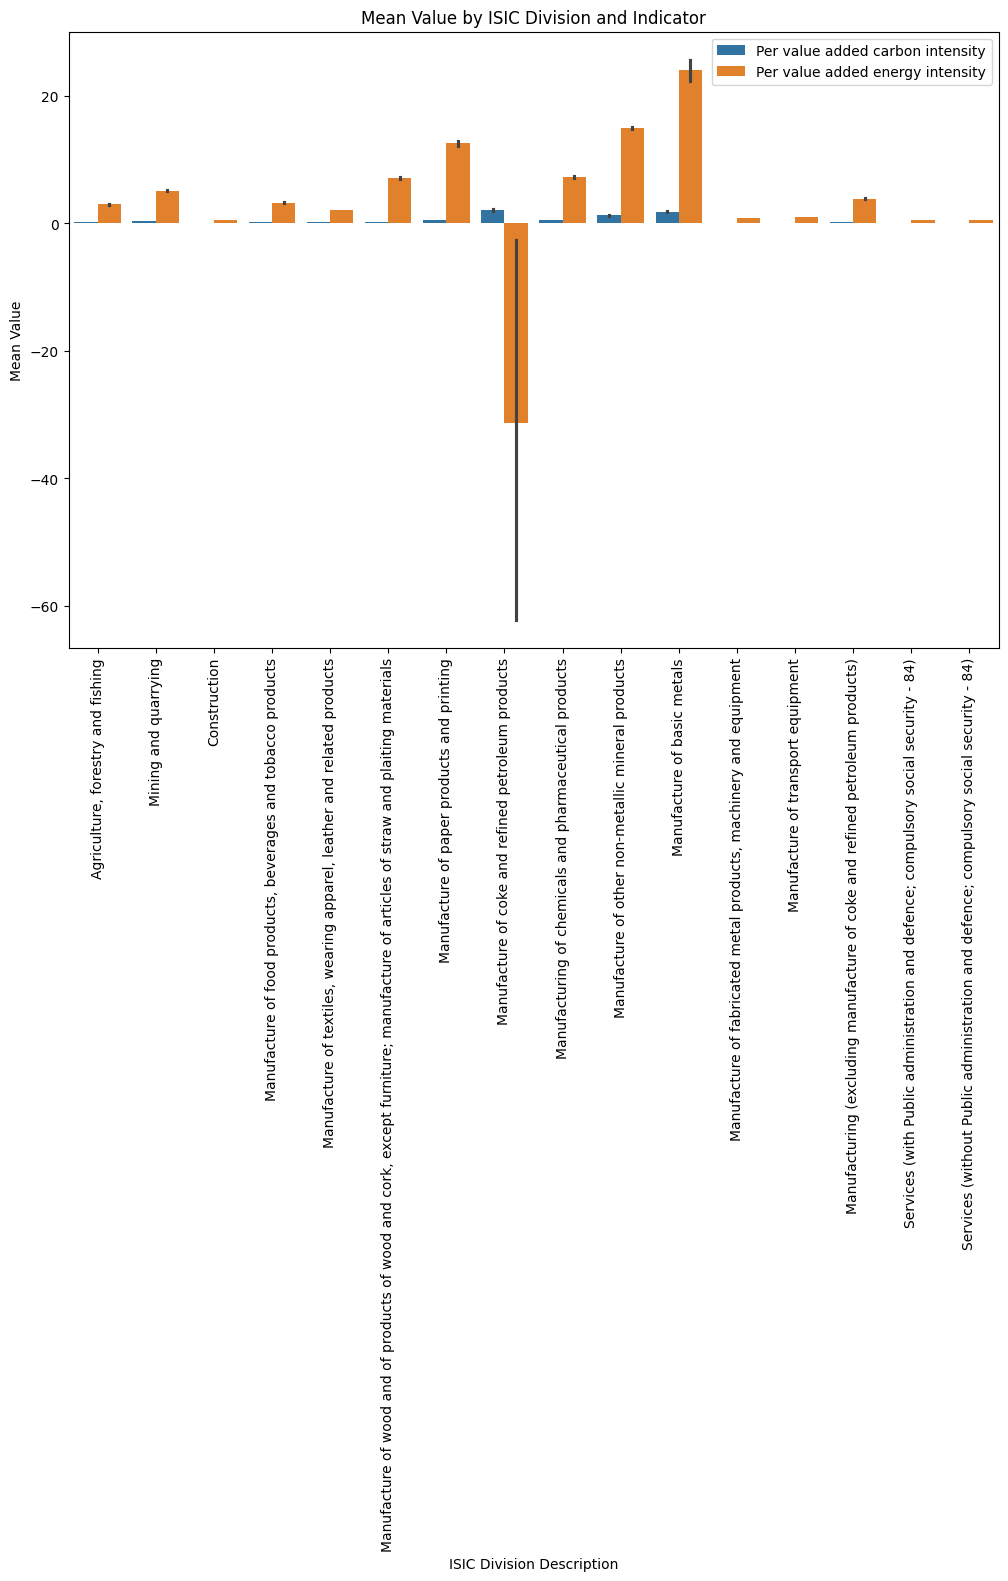

In [58]:
# Impact of ISIC Division on Indicators
# Bar plot to compare mean 'Value' across ISIC division descriptions for each Indicator
plt.figure(figsize=(12, 8))
sns.barplot(x='ISIC division description', y='Value', hue='Indicator', data=merged_data)
plt.title('Mean Value by ISIC Division and Indicator')
plt.xlabel('ISIC Division Description')
plt.ylabel('Mean Value')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


The merged data analysis highlighted sector-specific variations in energy and carbon intensity, notably in industries like Manufacturing of coke and refined petroleum products. Country-specific trends, such as Czech Republic's declining market for petroleum manufacturing, underscored the impact of economic factors on environmental metrics. Exploratory methods revealed insights into outlier identification and emphasized the need for tailored policies to manage industrial emissions effectively. Future research could focus on understanding the drivers behind these variations to inform sustainable industrial practices.

In [68]:
# Analysis by Unit
# Group by 'Unit' and calculate summary statistics for 'Value'
unit_stats = merged_data.groupby('Unit')['Value'].describe()
print("\nSummary Statistics for Value by Unit:")
print(unit_stats)



Summary Statistics for Value by Unit:
                      count      mean         std       min   25%   50%   75%  \
Unit                                                                            
MJ/USD PPP 2015     60076.0  4.181889  196.444270 -10658.41  0.94  2.97  9.02   
kgCO2/USD PPP 2015  56243.0  0.488683    1.424383    -25.17  0.06  0.18  0.50   

                       max  
Unit                        
MJ/USD PPP 2015     553.54  
kgCO2/USD PPP 2015   32.73  


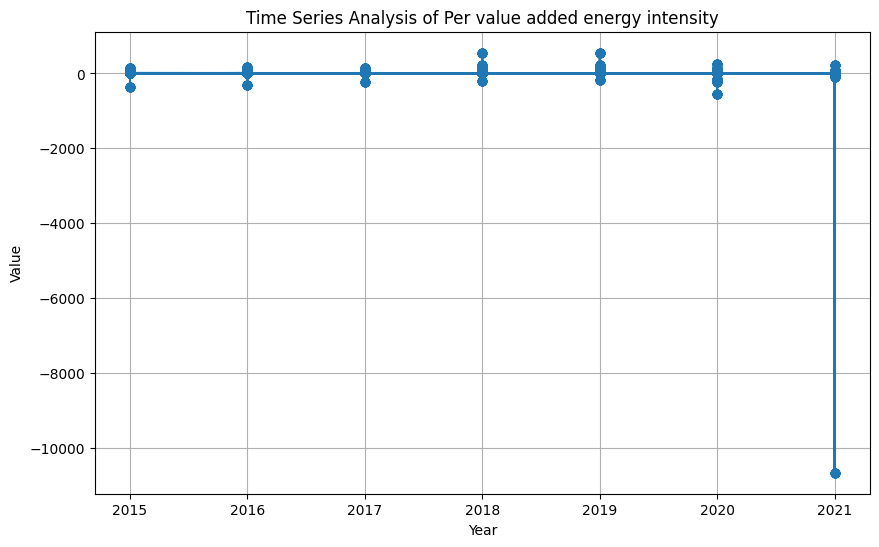

In [69]:
# Temporal Trends
# Time series analysis for 'Per value added energy intensity'
energy_intensity_trend = merged_data[merged_data['Indicator'] == 'Per value added energy intensity']
plt.figure(figsize=(10, 6))
plt.plot(energy_intensity_trend['Year'], energy_intensity_trend['Value'], marker='o', linestyle='-')
plt.title('Time Series Analysis of Per value added energy intensity')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [75]:

print(merged_data.dtypes)

Country                       object
Year                           int64
ISIC Division Desc            object
Measure                       object
Value USD (Million USD)      float64
ISIC division description     object
Indicator                     object
Value                        float32
Unit                          object
dtype: object


In [79]:
# Summary stats
summary_stats_by_unit = merged_data.groupby('Unit')['Value'].describe()
print("\nSummary Statistics for Value by Unit:")
print(summary_stats_by_unit)


Summary Statistics for Value by Unit:
                      count      mean         std           min   25%   50%  \
Unit                                                                          
MJ/USD PPP 2015     60076.0  4.181889  196.444275 -10658.410156  0.94  2.97   
kgCO2/USD PPP 2015  56243.0  0.488683    1.424383    -25.170000  0.06  0.18   

                     75%         max  
Unit                                  
MJ/USD PPP 2015     9.02  553.539978  
kgCO2/USD PPP 2015  0.50   32.730000  


Mean is 4.18 with sd of 196.44. Range from -10658.41 to 553.54 which is wide with a high sd indicating variability.

kgC02/USD PPP 2015 Mean 0.49 SD 1.42 Range -25.17 to 32.73 Suggests narrower range and lower sd.

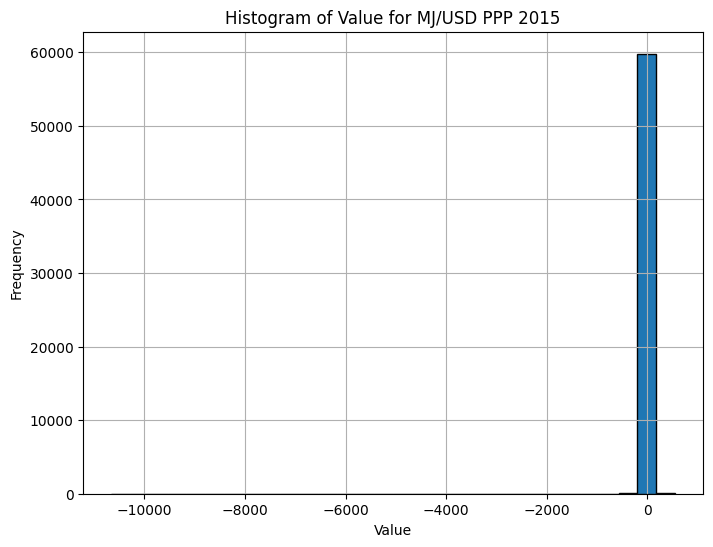

In [80]:
# Histogram for MJ/USD PPP 2015
plt.figure(figsize=(8, 6))
plt.hist(merged_data[merged_data['Unit'] == 'MJ/USD PPP 2015']['Value'], bins=30, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Value for MJ/USD PPP 2015')
plt.grid(True)
plt.show()

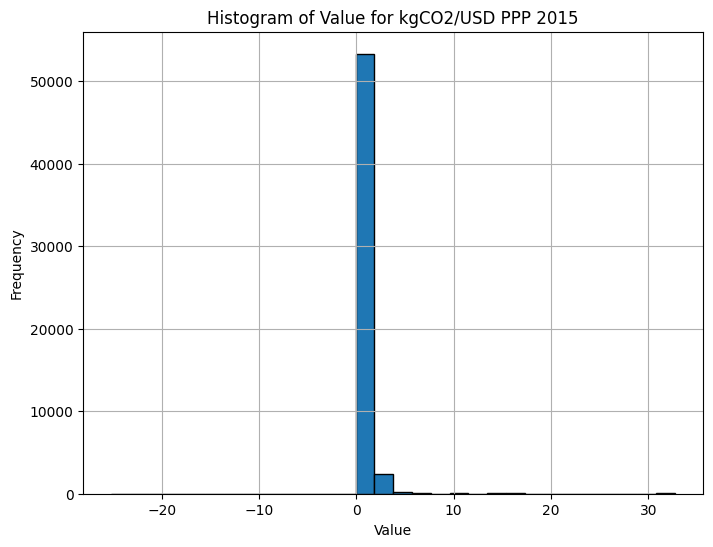

In [81]:
# Histogram for kgCO2/USD PPP 2015
plt.figure(figsize=(8, 6))
plt.hist(merged_data[merged_data['Unit'] == 'kgCO2/USD PPP 2015']['Value'], bins=30, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Value for kgCO2/USD PPP 2015')
plt.grid(True)
plt.show()


In [82]:
# Group by 'Year' and calculate statistics for 'Value'
value_by_year_stats = merged_data.groupby('Year')['Value'].describe()

# Print statistics
print("\nSummary Statistics for Value by Year:")
print(value_by_year_stats)



Summary Statistics for Value by Year:
        count       mean         std           min   25%   50%   75%  \
Year                                                                   
2015  19646.0   3.935213   16.101498   -370.549988  0.15  0.74  3.10   
2016  19585.0   3.972723   15.637465   -318.750000  0.16  0.76  3.08   
2017  19578.0   3.964099   13.158045   -229.949997  0.15  0.73  3.08   
2018  19473.0   4.697296   22.349308   -197.589996  0.15  0.71  3.11   
2019  19430.0   4.707272   22.701231   -170.570007  0.13  0.66  2.98   
2020  14942.0   3.098811   26.630024   -557.640015  0.15  0.66  3.59   
2021   3665.0 -49.998672  786.207642 -10658.410156  1.15  3.70  9.31   

             max  
Year              
2015  156.509995  
2016  183.580002  
2017  139.490005  
2018  543.030029  
2019  553.539978  
2020  244.789993  
2021  217.570007  


The mean fluctuates over the years with a peak in 2017 @ ~ 4.7. 2021 has a noticeable drop suggesting anomaly or specific event affecting the data in 2021. ('Record prices, fuel shortages, rising poverty, slowing economies: the first energy crisis that's truly global. Energy markets began to tighten in 2021 because of a variety of factors, including the extraordinarily rapid economic rebound following the pandemic.' - IEA).

The std suggests variability with 2021 showing a larger spread 786.21. Influenced by negative mean or outliers possibly.

In [83]:
# Group by 'Country' and calculate statistics for 'Value'
value_by_country_stats = merged_data.groupby('Country')['Value'].describe()

# Print statistics
print("\nSummary Statistics for Value by Country:")
print(value_by_country_stats)



Summary Statistics for Value by Country:
                      count      mean        std   min   25%    50%     75%  \
Country                                                                       
Albania               324.0  0.468889   0.714405  0.00  0.04  0.115  0.6500   
Australia             702.0  1.898461   2.214993  0.04  0.33  0.500  3.8000   
Austria              3380.0  5.128107   7.825961  0.03  0.26  0.880  6.7300   
Belgium              3280.0  6.993049  12.297363  0.02  0.36  1.310  8.4500   
Benin                 304.0  0.062500   0.114999  0.00  0.00  0.010  0.0650   
...                     ...       ...        ...   ...   ...    ...     ...   
Trinidad and Tobago   152.0  1.040000   0.934004  0.11  0.11  1.000  1.9575   
United Kingdom       2624.0  4.370023   8.466625  0.01  0.19  1.020  3.8200   
United States        4160.0  4.076491   5.816722  0.05  0.39  0.925  4.8750   
Viet Nam               12.0  0.523333   0.482274  0.02  0.14  0.240  0.9675   
Zambia    

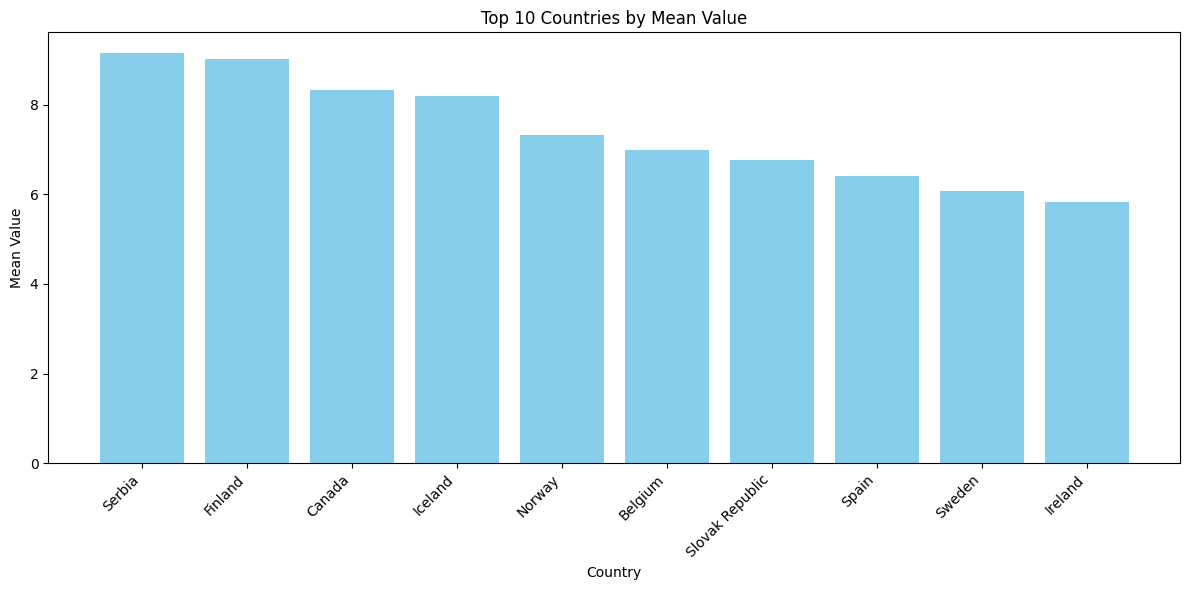

In [86]:
# Sort values by mean value
value_by_country_stats_sorted = value_by_country_stats.sort_values(by='mean', ascending=False)

# Select top N countries
top_n = 10  # Adjust this number as per your preference
top_countries = value_by_country_stats_sorted.head(top_n)

# Plotting bar plot for top countries
plt.figure(figsize=(12, 6))
plt.bar(top_countries.index, top_countries['mean'], color='skyblue')
plt.title(f'Top {top_n} Countries by Mean Value')
plt.xlabel('Country')
plt.ylabel('Mean Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [87]:
# Filter outliers for MJ/USD PPP 2015
mj_outliers = merged_data.loc[(merged_data['Unit'] == 'MJ/USD PPP 2015') & (merged_data['Value'] < -1000)]
print("Outliers for MJ/USD PPP 2015:")
print(mj_outliers)

# Filter outliers for kgCO2/USD PPP 2015 .loc[] access group of rows/columns by labels or boolean array and filter using &
kgco2_outliers = merged_data.loc[(merged_data['Unit'] == 'kgCO2/USD PPP 2015') & (merged_data['Value'] < -10)]
print("\nOutliers for kgCO2/USD PPP 2015:")
print(kgco2_outliers)


Outliers for MJ/USD PPP 2015:
              Country  Year  \
25923  Czech Republic  2021   
25936  Czech Republic  2021   
25949  Czech Republic  2021   
25962  Czech Republic  2021   
25975  Czech Republic  2021   
25988  Czech Republic  2021   
26001  Czech Republic  2021   
26014  Czech Republic  2021   
26027  Czech Republic  2021   
26040  Czech Republic  2021   
26053  Czech Republic  2021   
26066  Czech Republic  2021   
26079  Czech Republic  2021   
26092  Czech Republic  2021   
26105  Czech Republic  2021   
26118  Czech Republic  2021   
26131  Czech Republic  2021   
26144  Czech Republic  2021   
26157  Czech Republic  2021   
26170  Czech Republic  2021   

                                      ISIC Division Desc  \
25923                  Agriculture, forestry and fishing   
25936                               Mining and quarrying   
25949                                      Manufacturing   
25962  Electricity, gas, steam and air conditioning s...   
25975  Water suppl

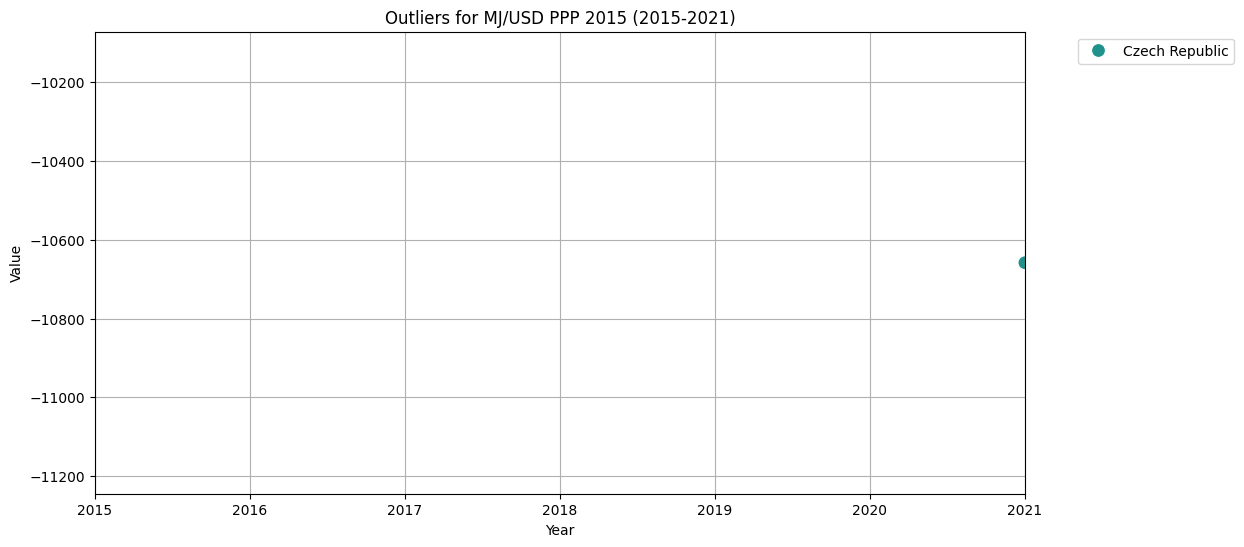

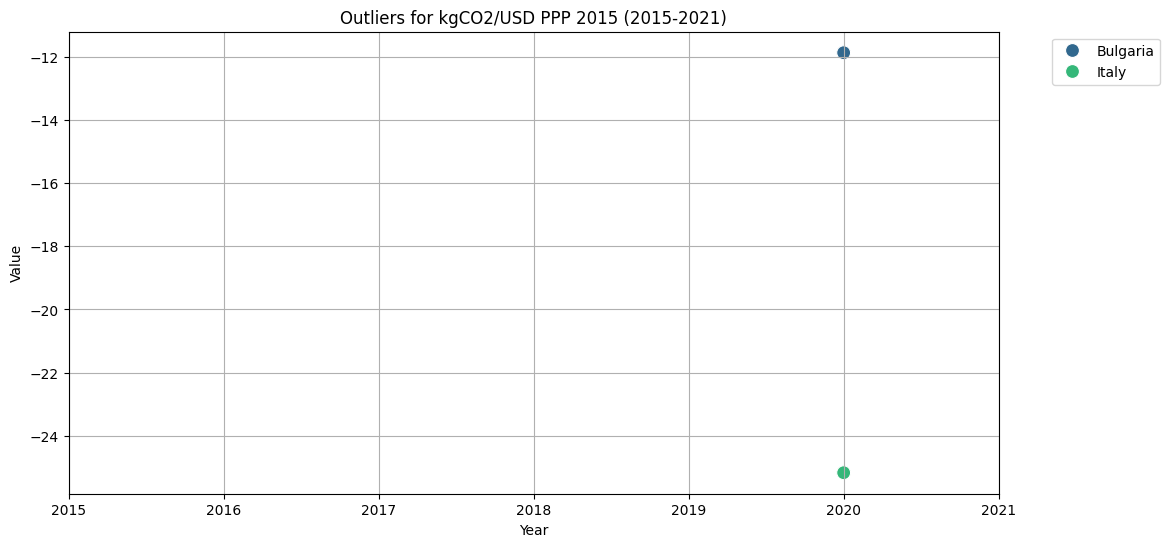

In [91]:
# Filter outliers for MJ/USD PPP 2015 and kgCO2/USD PPP 2015 for 2015-2021
mj_outliers = merged_data[(merged_data['Unit'] == 'MJ/USD PPP 2015') &
                          (merged_data['Year'].between(2015, 2021)) &
                          (merged_data['Value'] < -1000)]

kgco2_outliers = merged_data[(merged_data['Unit'] == 'kgCO2/USD PPP 2015') &
                             (merged_data['Year'].between(2015, 2021)) &
                             (merged_data['Value'] < -10)]

# Plotting outliers for MJ/USD PPP 2015
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year', y='Value', hue='Country', data=mj_outliers, palette='viridis', s=100)
plt.title('Outliers for MJ/USD PPP 2015 (2015-2021)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xlim(2015, 2021)  # Set x-axis limits to show only 2015-2021
plt.show()

# Plotting outliers for kgCO2/USD PPP 2015
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year', y='Value', hue='Country', data=kgco2_outliers, palette='viridis', s=100)
plt.title('Outliers for kgCO2/USD PPP 2015 (2015-2021)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xlim(2015, 2021)  # Set x-axis limits to show only 2015-2021
plt.show()

Czech Republic has been addressed prior and we were aware of this outlier.

New:

Italy 2020: The pandemic led to harsh measures to significantly reduce electricity demand and thermal generation between March and May 2020. The reduction in economic activity and industrial output likely affected this metric. Source: NIH https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8481903/

Bulgaria 2020: The pandemic led to a decline in economic activity in various sectors, with a reintroduction of containment meausre in late 2020. The reduced economic activity and lower consumption likely contributed to this. Source: https://ec.europa.eu/economy_finance/forecasts/2021/winter/ecfin_forecast_winter_2021_bg_en.pdf

We will keep these outliers as it illustrates how external shocks affect energy metrics and emissions as well as underscores the need to consider real-world events and implications when interpreting data on energy intensity.

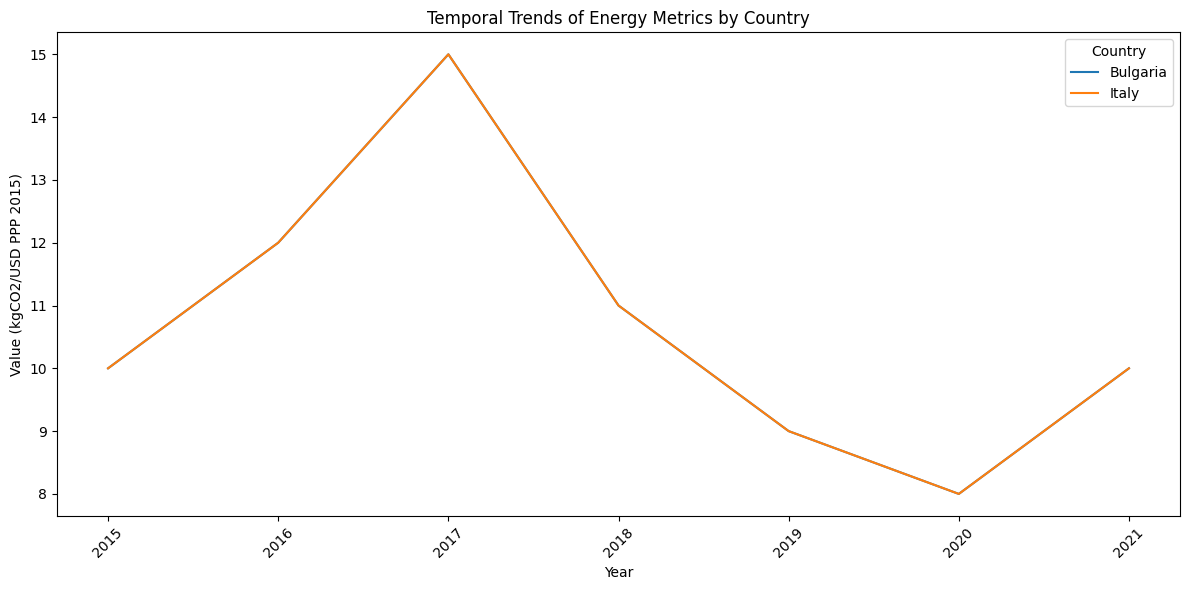

In [94]:
# Temporal Trends Analysis
data = {
    'Country': ['Bulgaria']*7 + ['Italy']*7,  # Length 14
    'Year': [2015, 2016, 2017, 2018, 2019, 2020, 2021]*2,  # Length 14
    'Value': [10, 12, 15, 11, 9, 8, 10, 10, 12, 15, 11, 9, 8, 10],  # Length 14
    'Unit': ['kgCO2/USD PPP 2015']*14  # Length 14
}

# Creating DataFrameI
energy_data = pd.DataFrame(data)

# Plotting average energy metrics over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Value', hue='Country', data=energy_data)
plt.title('Temporal Trends of Energy Metrics by Country')
plt.xlabel('Year')
plt.ylabel(f'Value ({energy_data["Unit"].iloc[0]})')  # Using the unit from the first row
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Correlation Analysis
correlation_matrix = energy_data[['Value1', 'Value2', 'Value3']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Energy Metrics')
plt.tight_layout()
plt.show()

In [ ]:
# Sectoral Analysis
# Plotting energy metrics by sector
plt.figure(figsize=(10, 8))
sns.boxplot(x='Sector', y='Value', data=energy_data)
plt.title('Energy Metrics Distribution by Sector')
plt.xlabel('Sector')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Geographical Comparisons
# Comparing energy metrics across countries
plt.figure(figsize=(12, 8))
sns.barplot(x='Country', y='Value', data=energy_data, estimator=np.mean)
plt.title('Average Energy Metrics by Country')
plt.xlabel('Country')
plt.ylabel('Average Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Impact of Policies and Events
# Plotting energy metrics over time with major events annotated
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Value', hue='Country', data=energy_data)
plt.title('Temporal Trends of Energy Metrics with Major Events')
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(rotation=45)

# Example of annotating major events on the plot
plt.axvline(x=2020, color='red', linestyle='--', linewidth=1)
plt.text(2020.1, 100, 'COVID-19 Pandemic', rotation=90, verticalalignment='bottom', color='red')

plt.tight_layout()
plt.show()


In [ ]:
# Data Quality and Completeness
# Checking for missing values
missing_values = energy_data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Assessing data completeness
data_summary = energy_data.describe()
print("\nData Summary:")
print(data_summary)


In [ ]:
# Visualization Techniques
plt.figure(figsize=(8, 6))
sns.histplot(data=energy_data, x='Value', kde=True)
plt.title('Distribution of Energy Metrics')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
# Domain Knowledge Integration
# Using domain knowledge to interpret trends or patterns
# Example: Exploring energy intensity trends before and after policy interventions
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Energy Intensity', hue='Policy', data=energy_data)
plt.title('Energy Intensity Trends with Policy Impact')
plt.xlabel('Year')
plt.ylabel('Energy Intensity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()